In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# 1. Načítanie JSON súboru
with open("data.json", "r") as file:
    json_data = json.load(file)

# 2. Extrahovanie sekcie "data"
df = pd.json_normalize(json_data["data"])

# 3. Premenovanie stĺpcov pre lepšiu čitateľnosť
df.columns = df.columns.str.replace(r"\.", "_", regex=True)

# 4. Prevod timestampu na datetime formát
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

# 5. Nastavenie časového indexu
df.set_index('timestamp', inplace=True)

# 6. Hodinová agregácia (napr. priemer)
df = df.resample('1h').mean()

# 7. Zobrazenie prvých riadkov z hodinovo agregovaných dát
print(df.tail())

                           U_L1      I_L1         P_L1        Q_L1
timestamp                                                         
2024-11-25 05:00:00  241.875683  1.899683   376.167333 -157.742150
2024-11-25 06:00:00  242.101150  2.517483   538.411867  -83.347750
2024-11-25 07:00:00  242.210167  1.812800   276.782950  110.196817
2024-11-25 08:00:00  241.571183  5.723533  1122.427583  380.538150
2024-11-25 09:00:00  241.406000  2.858000   363.827000  380.706000


In [4]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# 1. Načítanie JSON súboru
with open("data2.json", "r") as file:
    json_data2 = json.load(file)

# 2. Extrahovanie sekcie "data"
df2 = pd.json_normalize(json_data2["data"])

# 3. Premenovanie stĺpcov pre lepšiu čitateľnosť
df2.columns = df2.columns.str.replace(r"\.", "_", regex=True)

# 4. Prevod timestampu na datetime formát
df2['timestamp'] = pd.to_datetime(df2['timestamp'], unit='s')

# 5. Nastavenie časového indexu
df2.set_index('timestamp', inplace=True)

# 6. Hodinová agregácia (napr. priemer)
df2 = df2.resample('1h').mean()

# 7. Zobrazenie prvých riadkov z hodinovo agregovaných dát
print(df2.tail())


                           U_L1        U_L2        U_L3  U_cumulative  \
timestamp                                                               
2024-11-25 05:00:00  243.024067  244.675467  235.729450    241.143050   
2024-11-25 06:00:00  245.241050  245.588800  239.173983    243.334667   
2024-11-25 07:00:00  245.807700  245.210783  241.104100    244.040817   
2024-11-25 08:00:00  243.456817  246.216533  240.537400    243.403633   
2024-11-25 09:00:00  244.010000  243.160000  238.323000    241.831000   

                         I_L1      I_L2      I_L3  I_cumulative       P_L1  \
timestamp                                                                    
2024-11-25 05:00:00  0.447417  0.378317  0.213667      1.039400  53.797383   
2024-11-25 06:00:00  0.422050  0.413767  0.149733      0.985550  42.064467   
2024-11-25 07:00:00  0.421483  0.358733  0.149550      0.929767  42.364467   
2024-11-25 08:00:00  0.418917  0.360300  0.304233      1.083450  41.936767   
2024-11-25 09:00:00 

In [5]:
def clip_extremes_inplace(df, lower_q=0.005, upper_q=0.995):
    for col in df.columns:
        lower = df[col].quantile(lower_q)
        upper = df[col].quantile(upper_q)
        df[col] = df[col].clip(lower=lower, upper=upper)


In [6]:
clip_extremes_inplace(df2)

In [7]:
import pandas as pd

def fill_rows_from_previous_day(df, target_column='P_cumulative'):
    df_filled = df.copy()
    for timestamp in df.index:
        if pd.isna(df_filled.loc[timestamp, target_column]):
            prev_day_timestamp = timestamp - pd.Timedelta(days=1)
            if prev_day_timestamp in df_filled.index:
                df_filled.loc[timestamp] = df_filled.loc[prev_day_timestamp]
    return df_filled

In [9]:
df2 = fill_rows_from_previous_day(df2)

In [14]:
df2.isna().any(axis=1).sum()

0

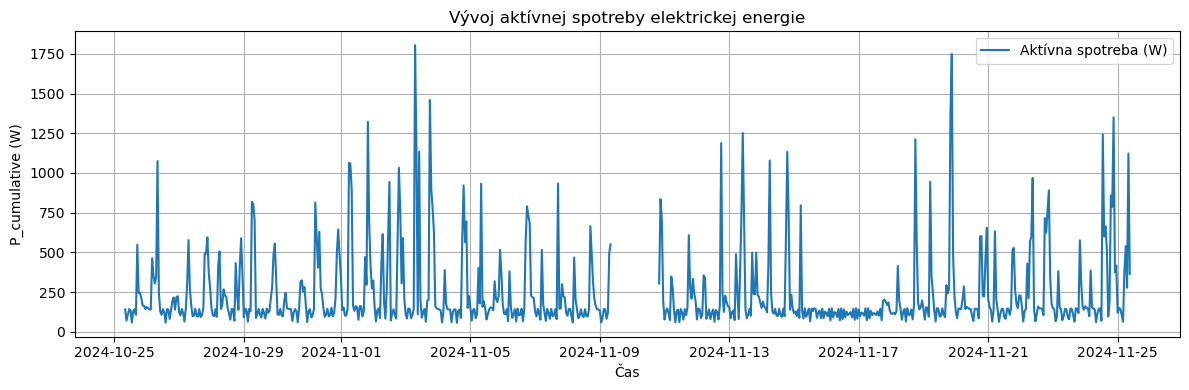

In [16]:
plt.figure(figsize=(12, 4))
plt.plot(df.index, df['P_L1'], label='Aktívna spotreba (W)')
plt.title('Vývoj aktívnej spotreby elektrickej energie')
plt.xlabel('Čas')
plt.ylabel('P_cumulative (W)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

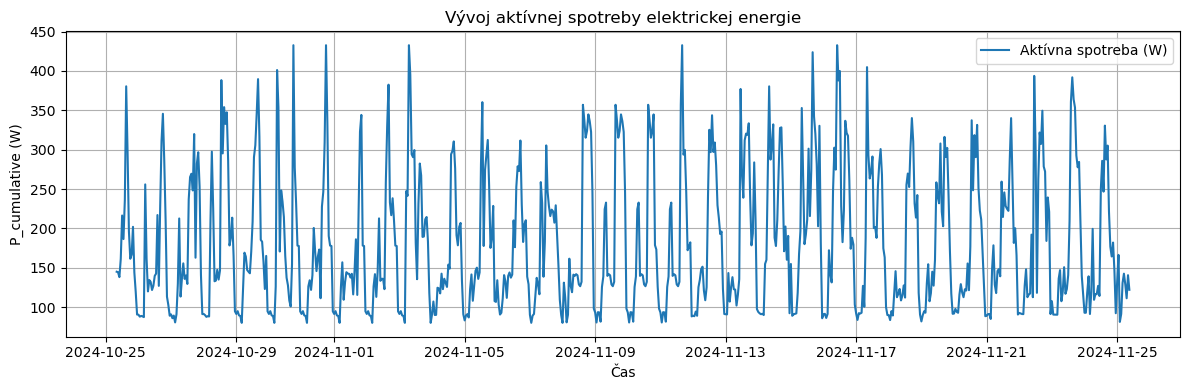

In [17]:
plt.figure(figsize=(12, 4))
plt.plot(df2.index, df2['P_cumulative'], label='Aktívna spotreba (W)')
plt.title('Vývoj aktívnej spotreby elektrickej energie')
plt.xlabel('Čas')
plt.ylabel('P_cumulative (W)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

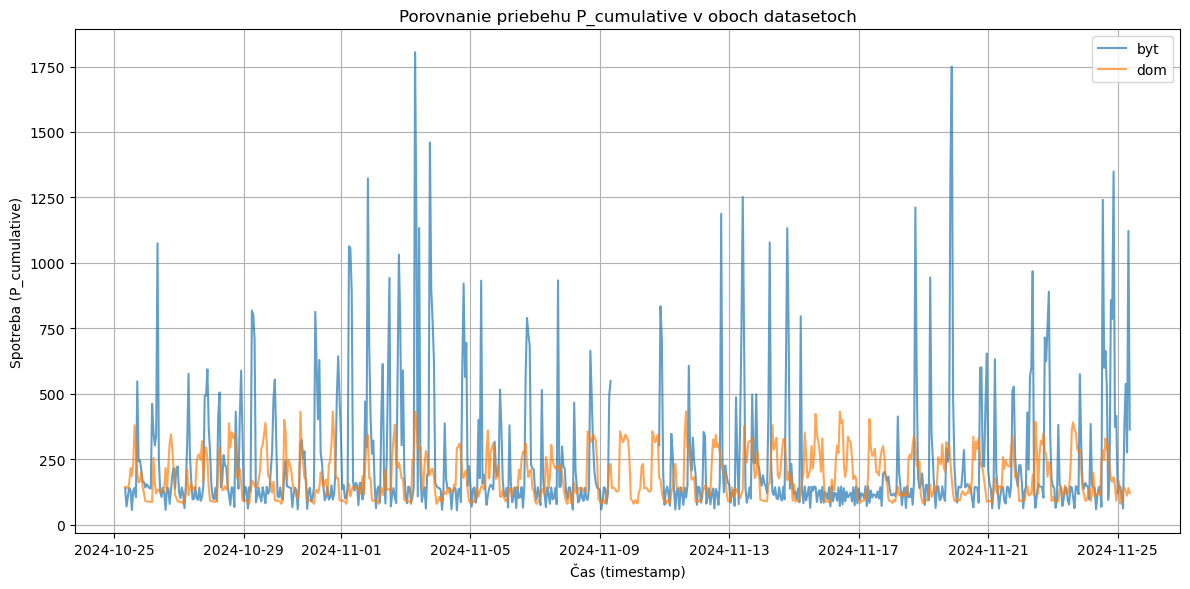

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # nastav veľkosť grafu

# Prvý dataset
plt.plot(df.index, df['P_L1'], label='byt', alpha=0.7)

# Druhý dataset
plt.plot(df2.index, df2['P_cumulative'], label='dom', alpha=0.7)

plt.title('Porovnanie priebehu P_cumulative v oboch datasetoch')
plt.xlabel('Čas (timestamp)')
plt.ylabel('Spotreba (P_cumulative)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\patri\AppData\Local\Temp\ipykernel_130688\3899213300.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df2 = df2.asfreq('H')  # predpokladáme hodinové údaje



🔁 Iterácia 1/21
MAPE iterácie 1: 24.56%
MAE iterácie 1: 53.19


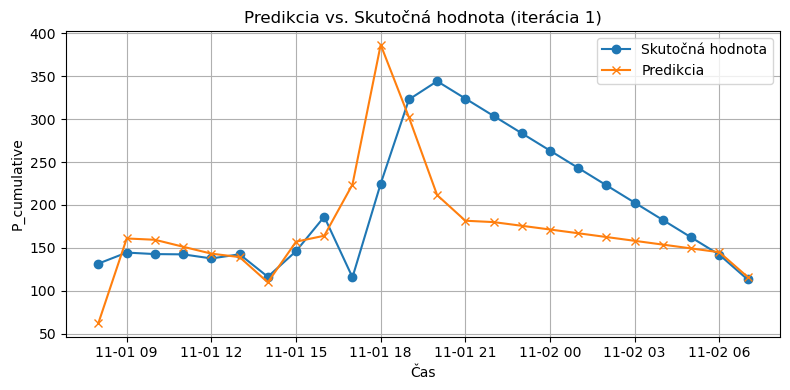

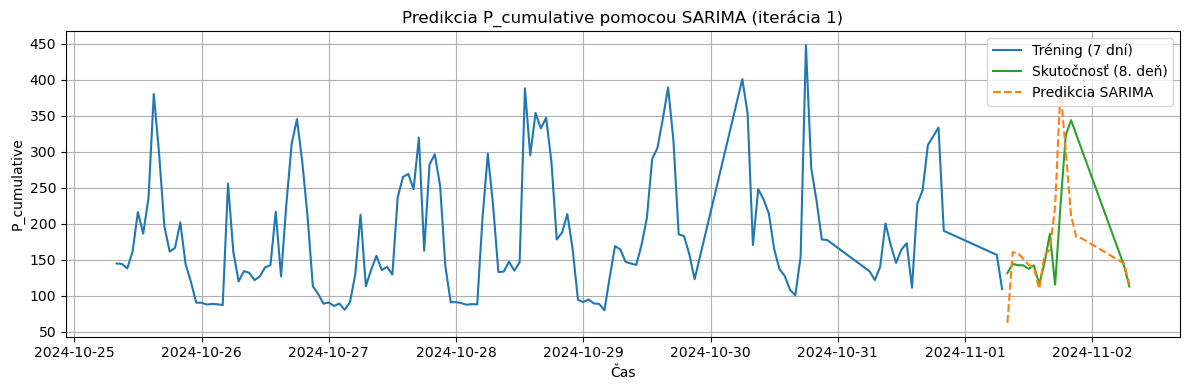


🔁 Iterácia 2/21
MAPE iterácie 2: 24.79%
MAE iterácie 2: 66.87


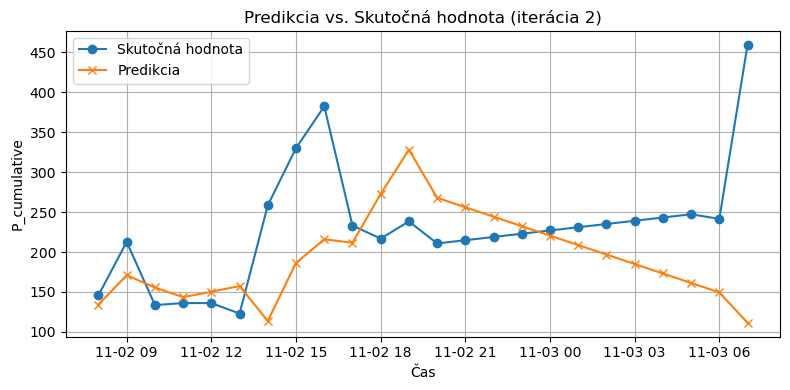

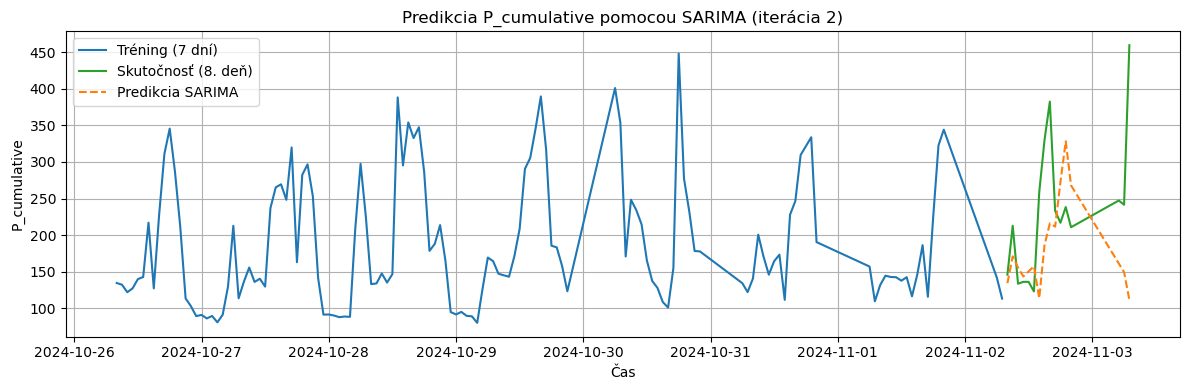


🔁 Iterácia 3/21
MAPE iterácie 3: 65.13%
MAE iterácie 3: 80.14


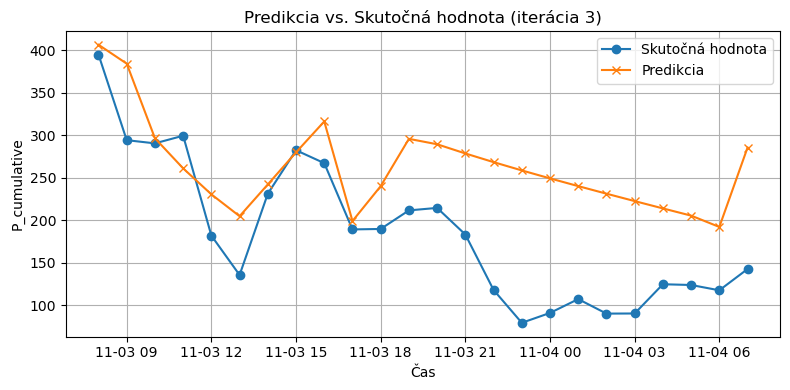

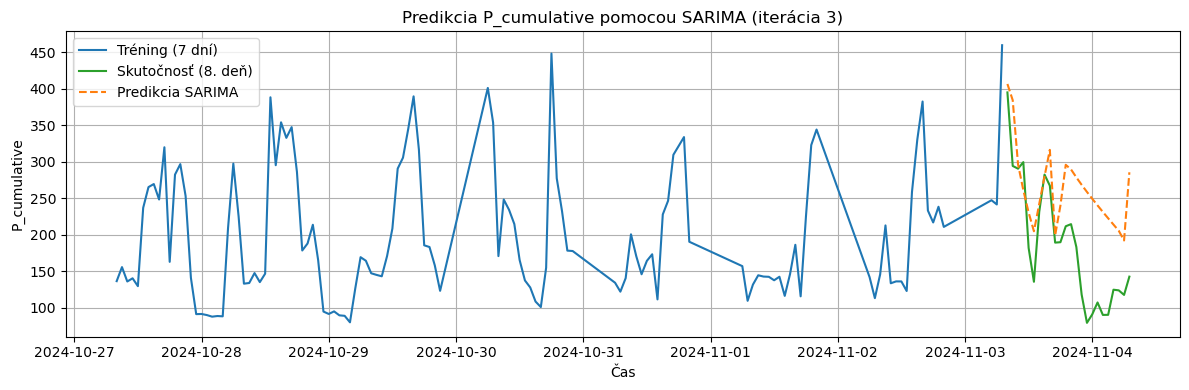


🔁 Iterácia 4/21
MAPE iterácie 4: 41.45%
MAE iterácie 4: 50.30


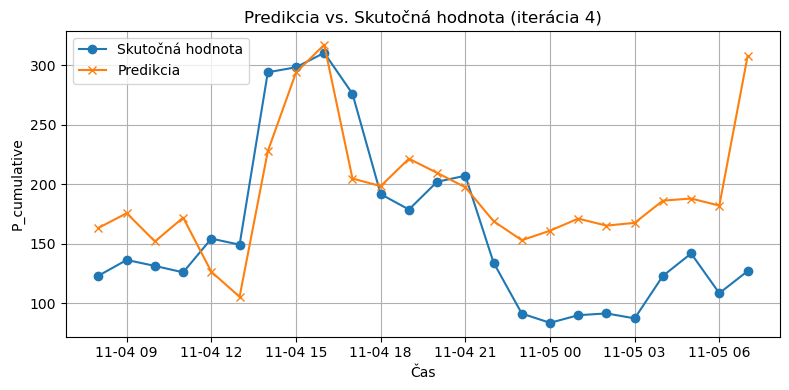

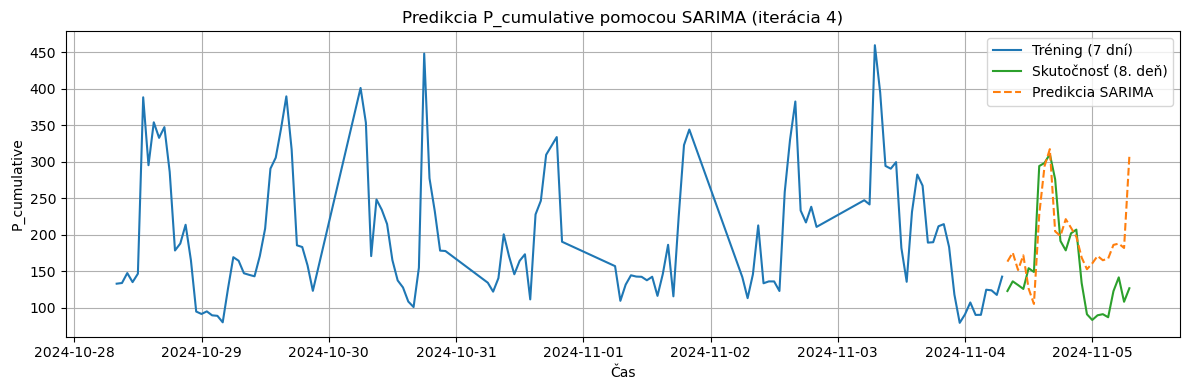


🔁 Iterácia 5/21
MAPE iterácie 5: 19.01%
MAE iterácie 5: 40.76


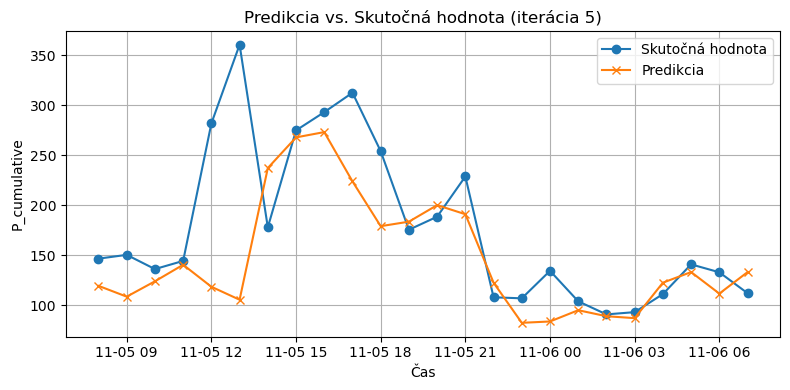

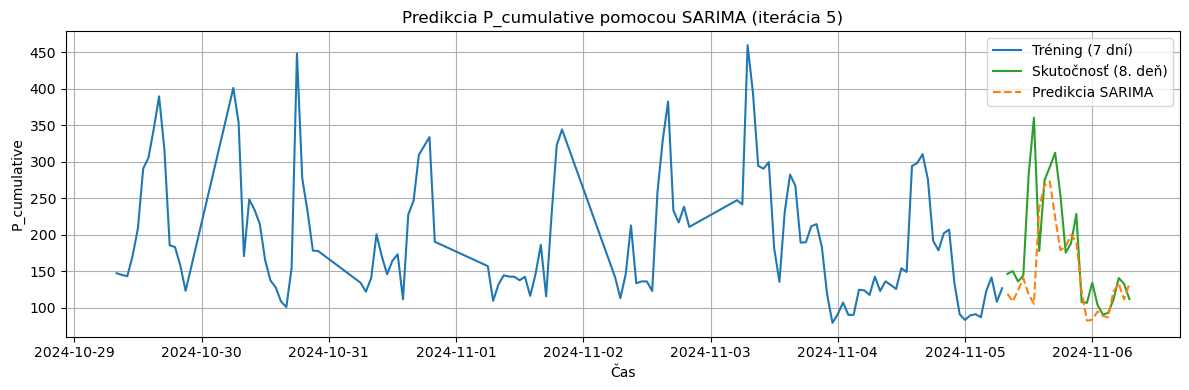


🔁 Iterácia 6/21
MAPE iterácie 6: 10.35%
MAE iterácie 6: 16.23


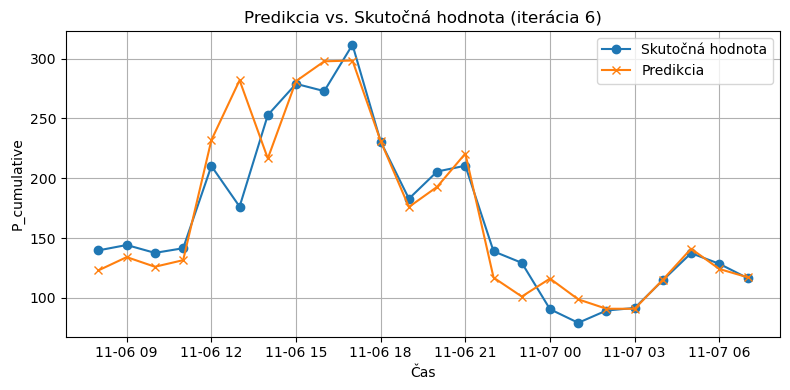

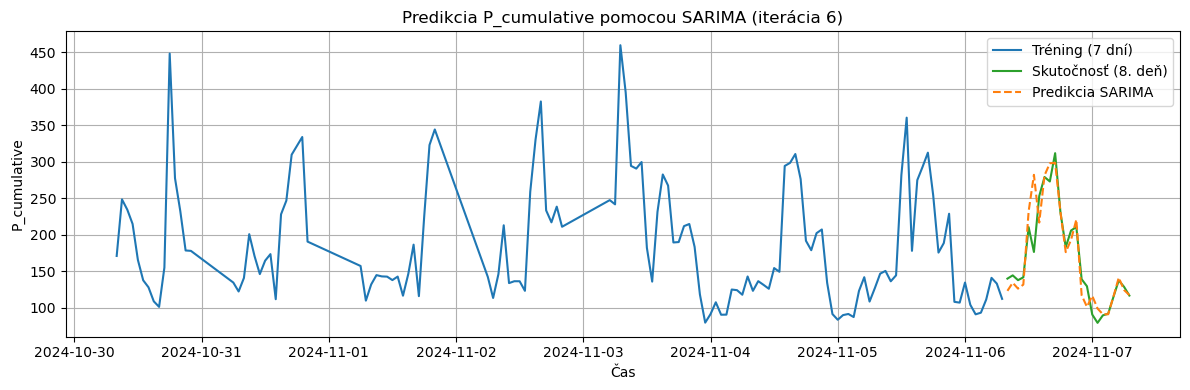


🔁 Iterácia 7/21
MAPE iterácie 7: 21.50%
MAE iterácie 7: 37.77


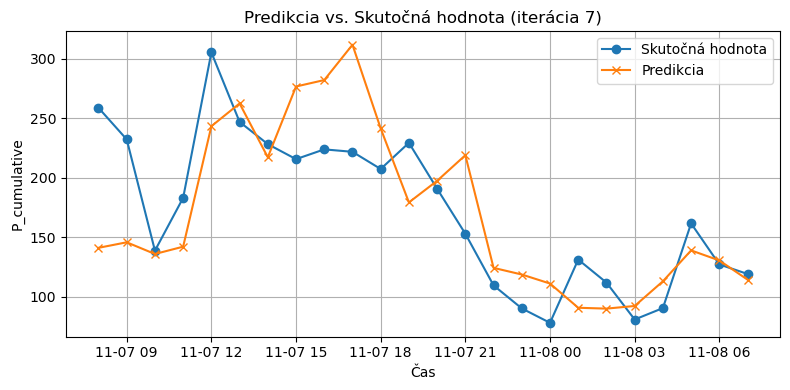

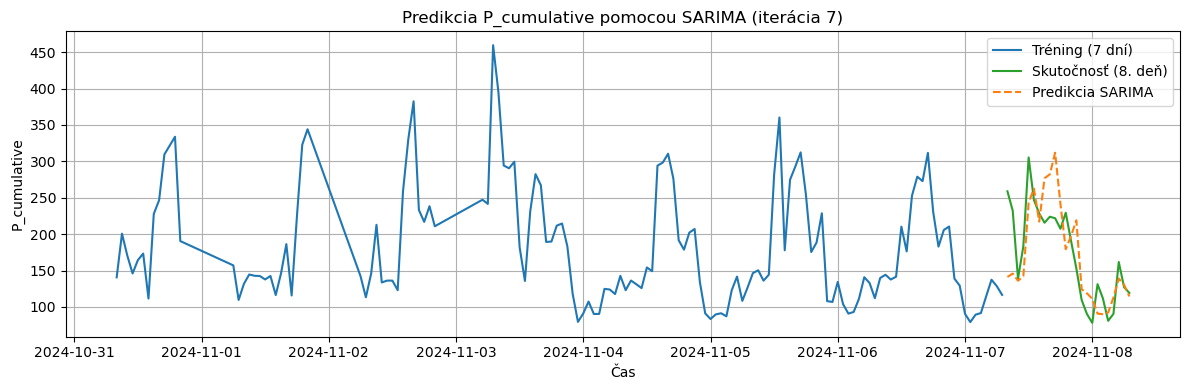


🔁 Iterácia 8/21
MAPE iterácie 8: 33.93%
MAE iterácie 8: 67.01


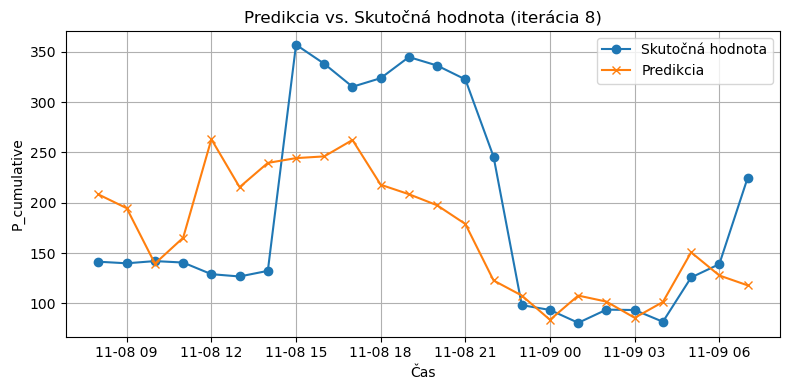

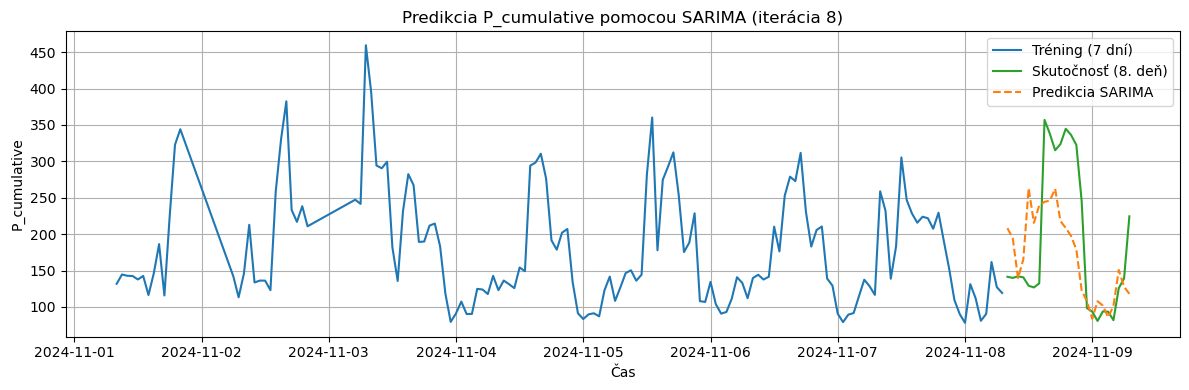


🔁 Iterácia 9/21
MAPE iterácie 9: 31.10%
MAE iterácie 9: 66.21


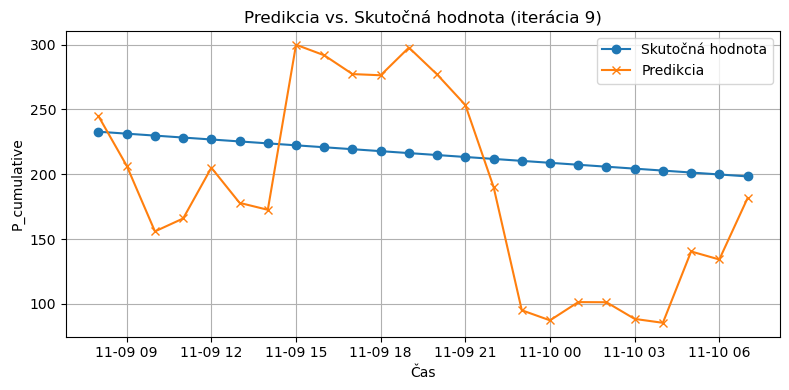

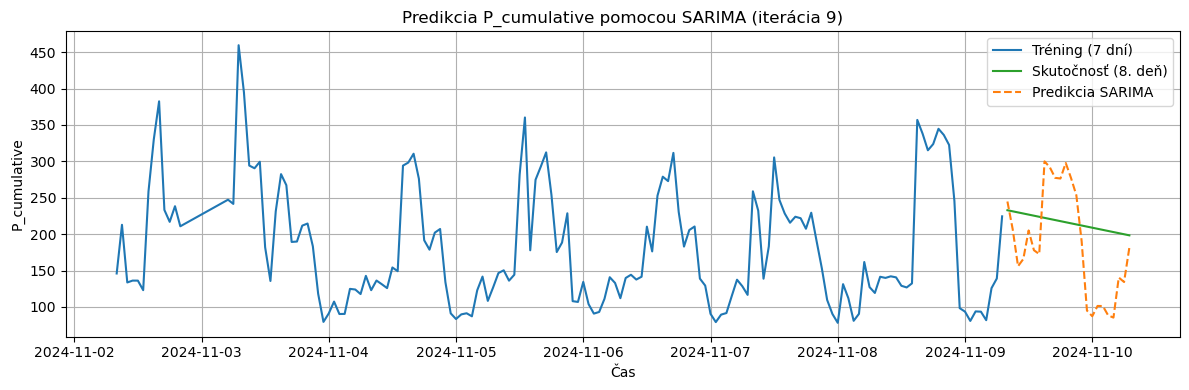


🔁 Iterácia 10/21
MAPE iterácie 10: 32.88%
MAE iterácie 10: 62.47


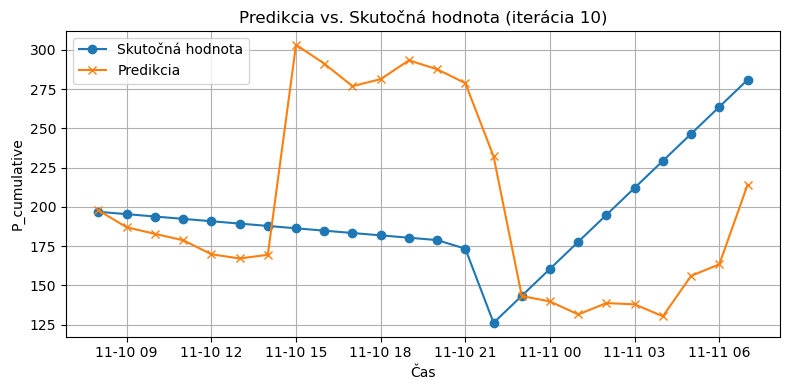

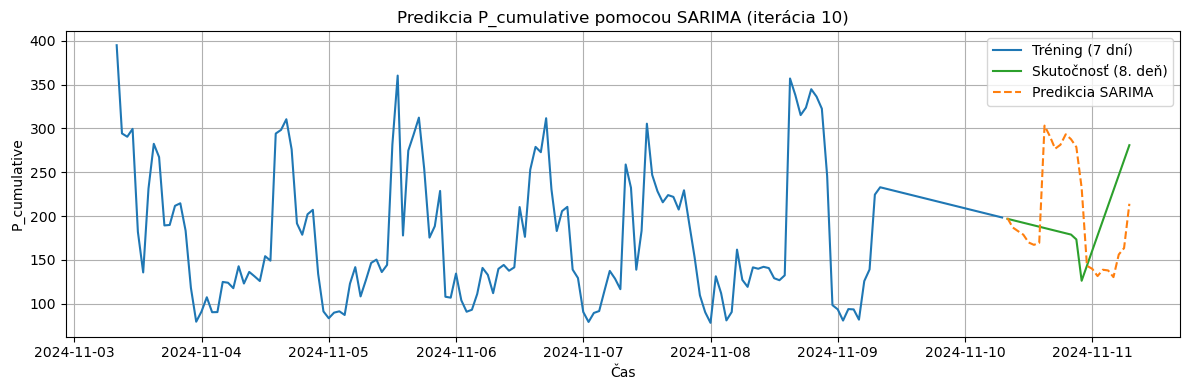


🔁 Iterácia 11/21
MAPE iterácie 11: 52.65%
MAE iterácie 11: 100.16


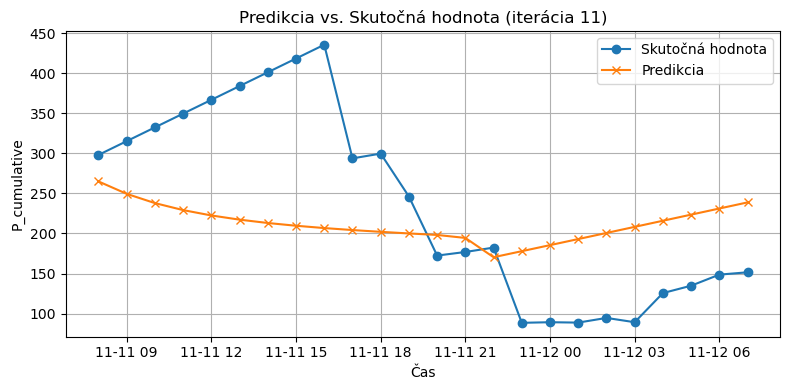

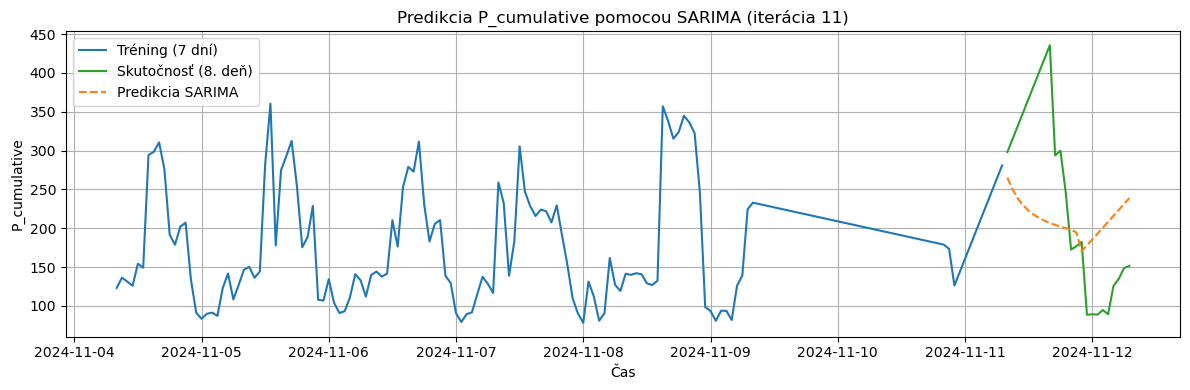


🔁 Iterácia 12/21
MAPE iterácie 12: 26.60%
MAE iterácie 12: 37.71


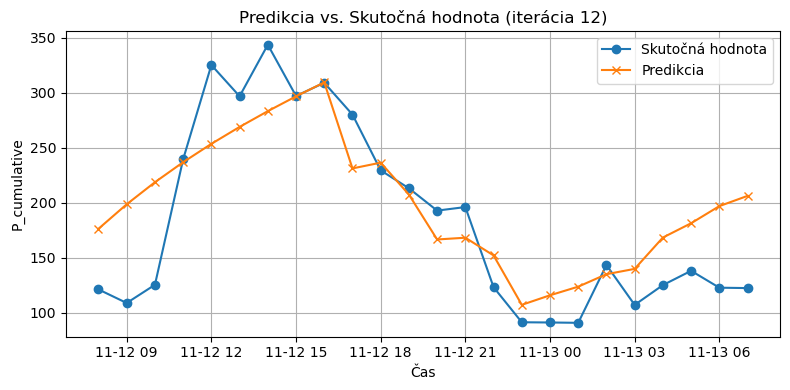

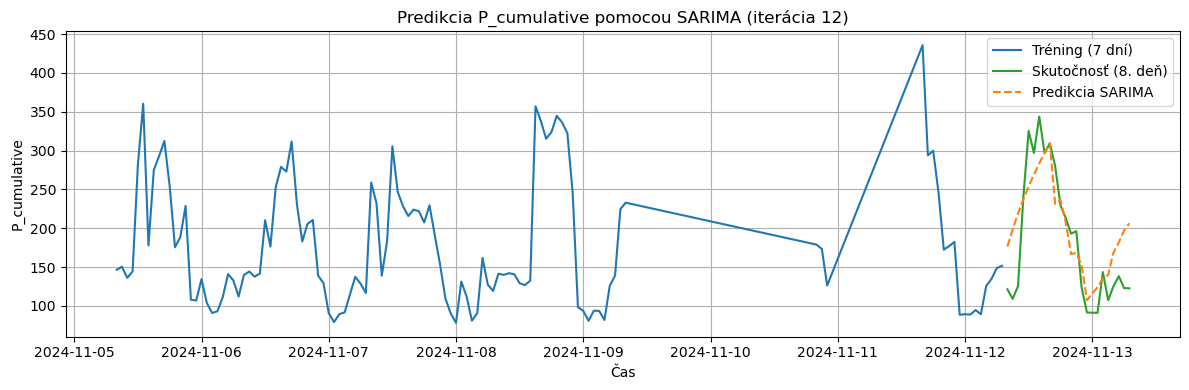


🔁 Iterácia 13/21
MAPE iterácie 13: 19.83%
MAE iterácie 13: 40.54


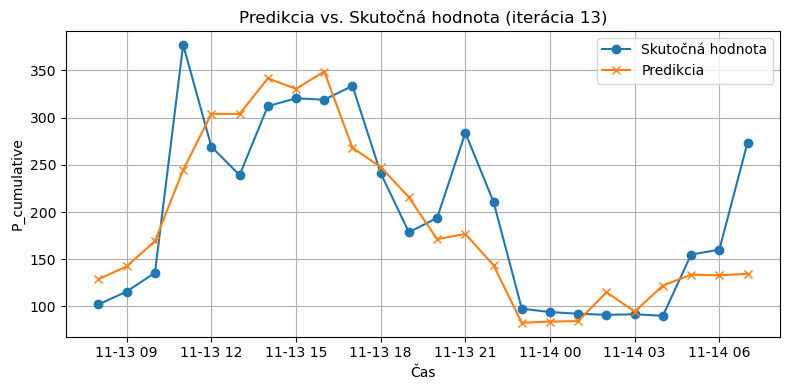

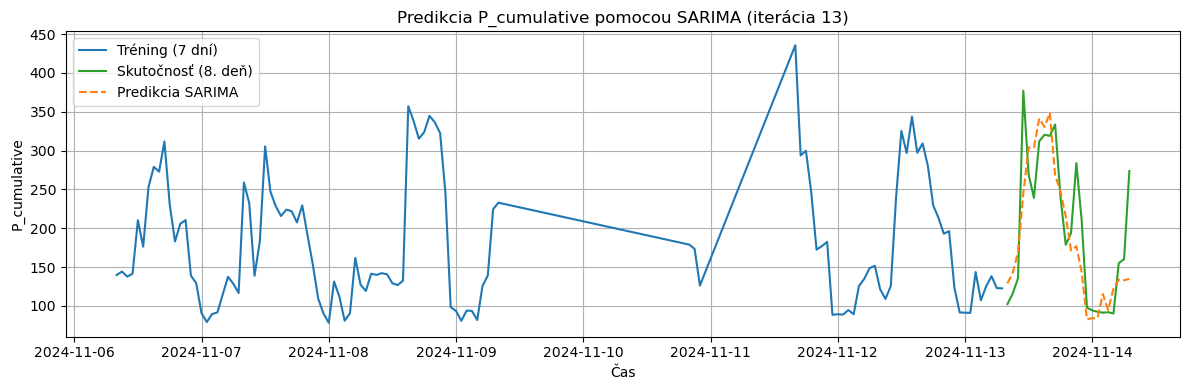


🔁 Iterácia 14/21
MAPE iterácie 14: 27.11%
MAE iterácie 14: 54.01


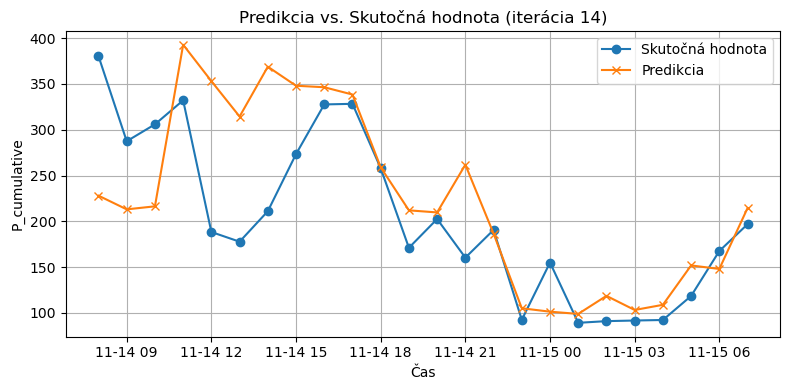

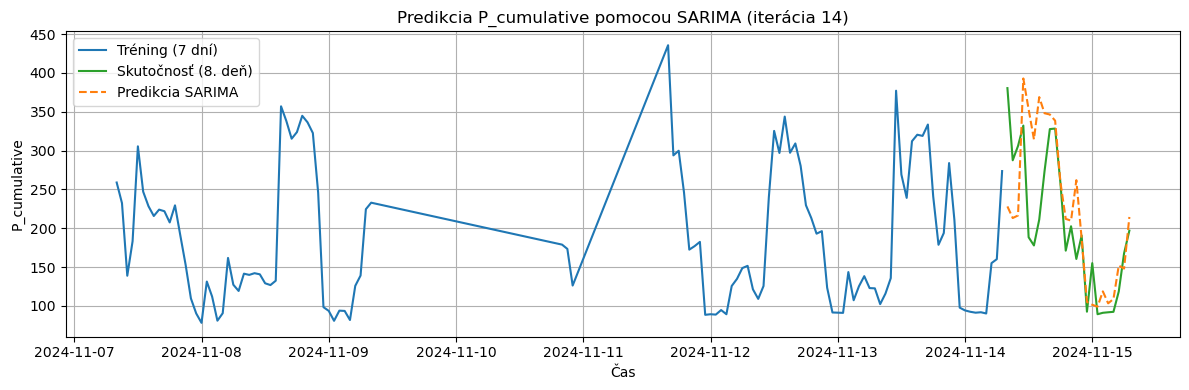


🔁 Iterácia 15/21
MAPE iterácie 15: 20.79%
MAE iterácie 15: 47.81


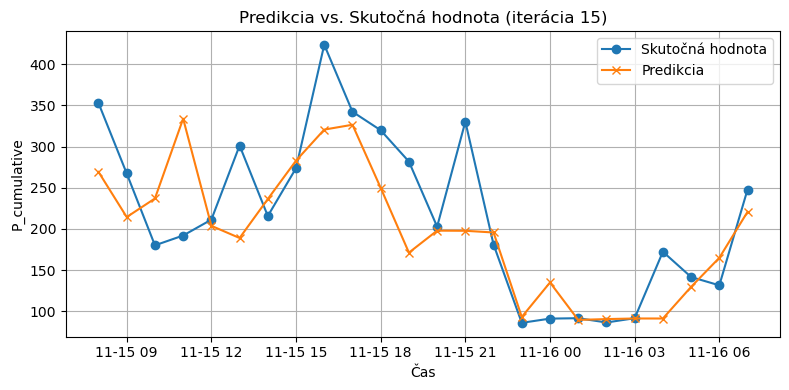

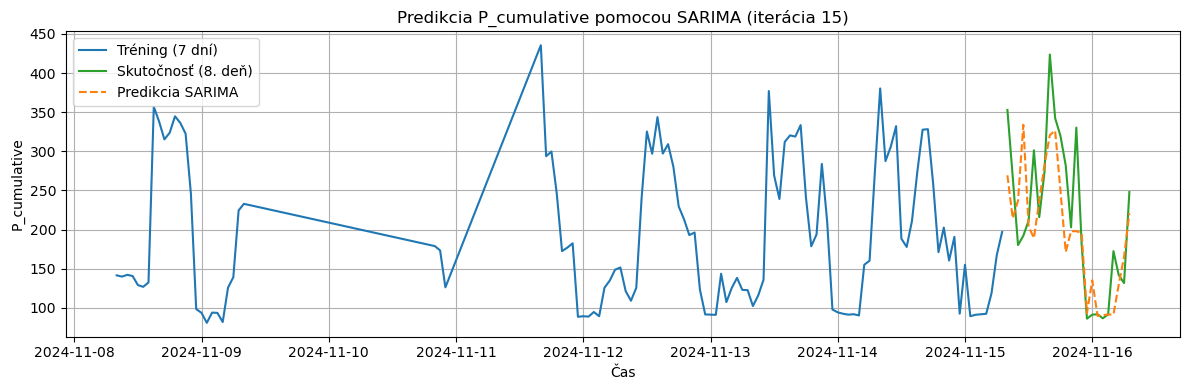


🔁 Iterácia 16/21
MAPE iterácie 16: 20.15%
MAE iterácie 16: 48.25


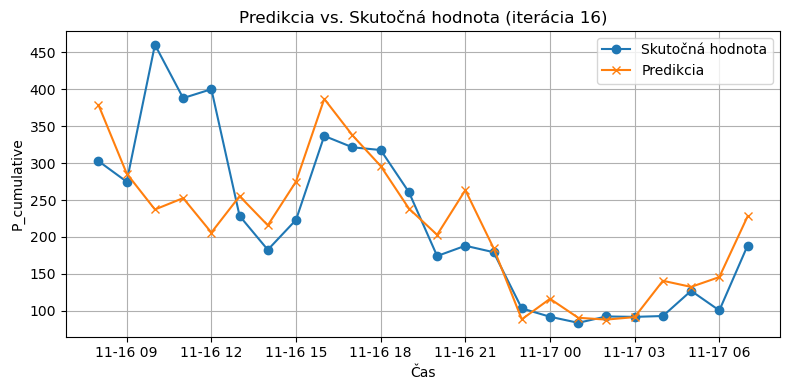

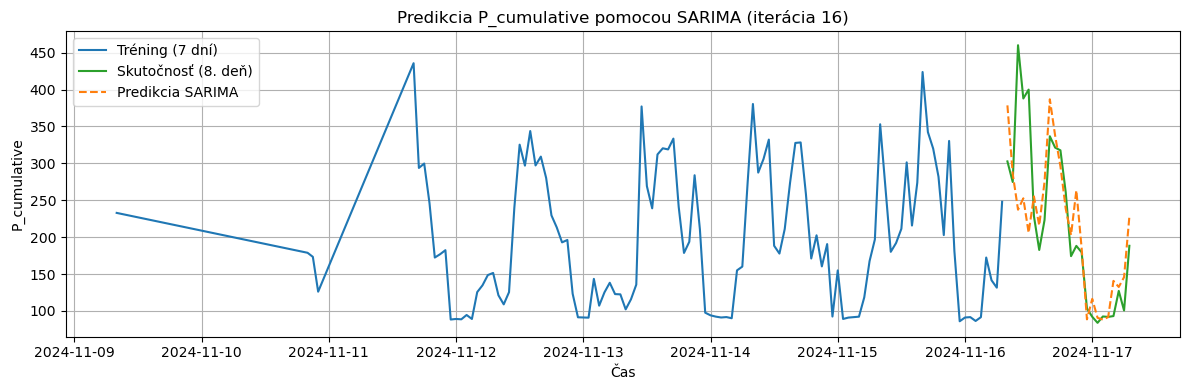


🔁 Iterácia 17/21
MAPE iterácie 17: 19.86%
MAE iterácie 17: 36.67


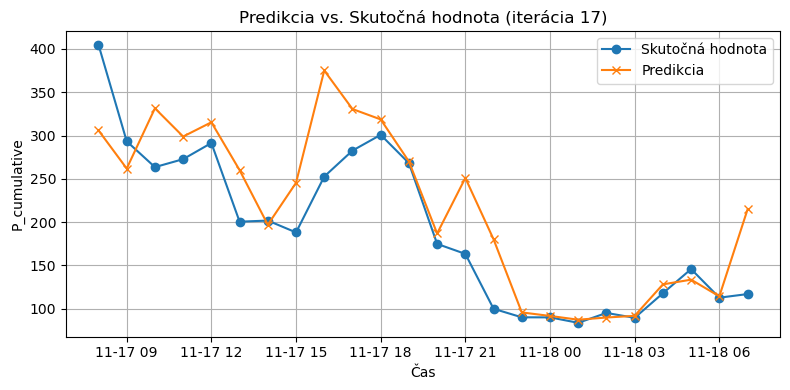

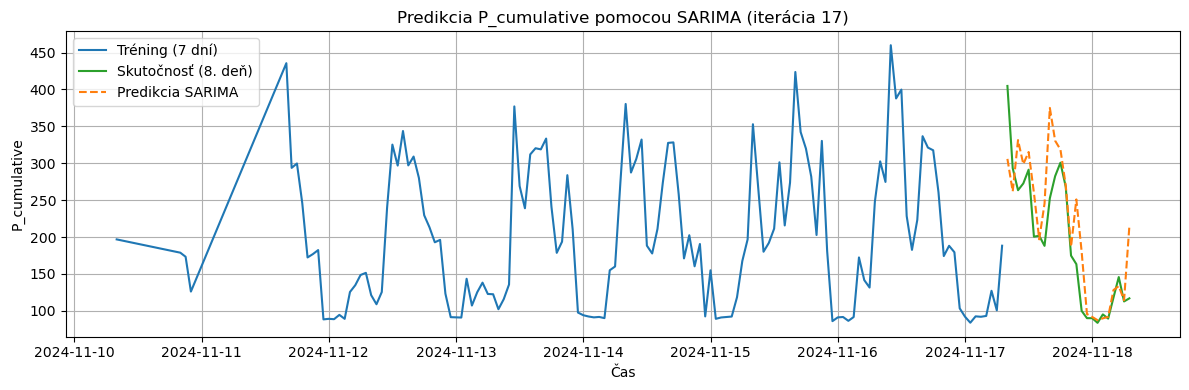


🔁 Iterácia 18/21
MAPE iterácie 18: 45.33%
MAE iterácie 18: 61.22


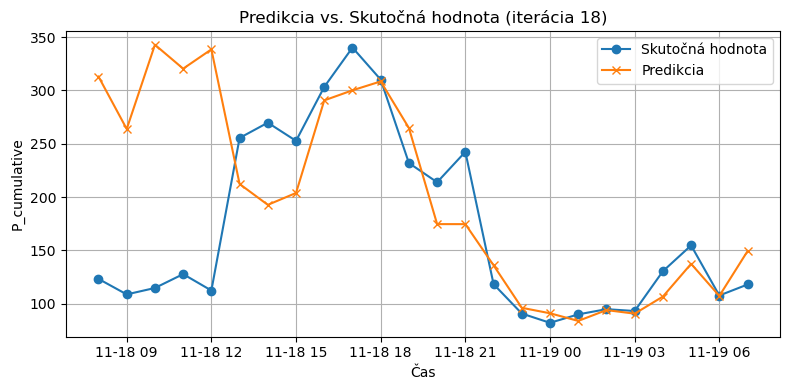

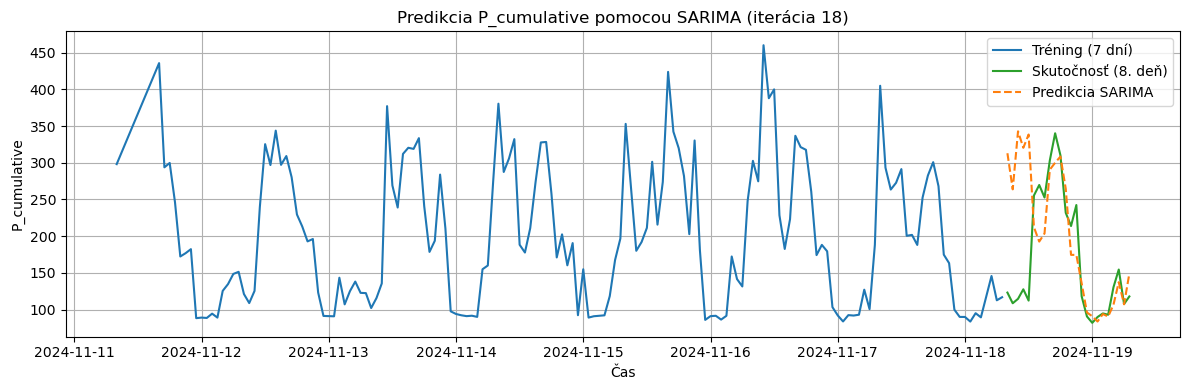


🔁 Iterácia 19/21
MAPE iterácie 19: 14.51%
MAE iterácie 19: 27.06


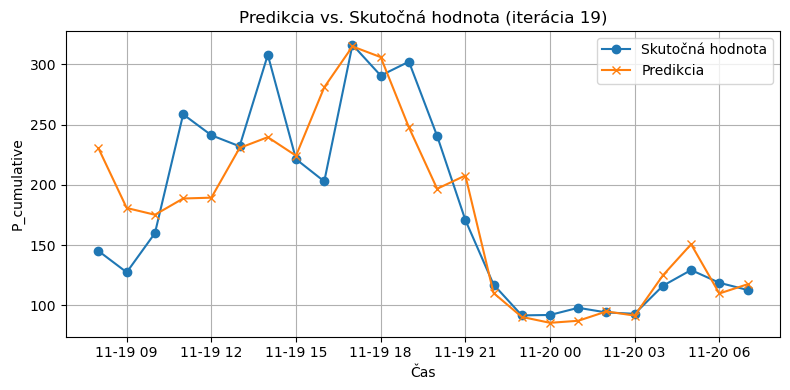

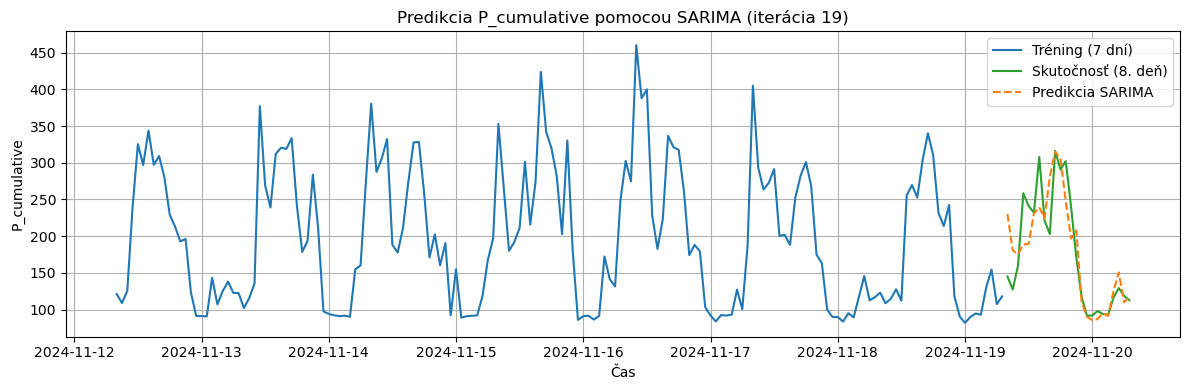


🔁 Iterácia 20/21
MAPE iterácie 20: 13.45%
MAE iterácie 20: 26.27


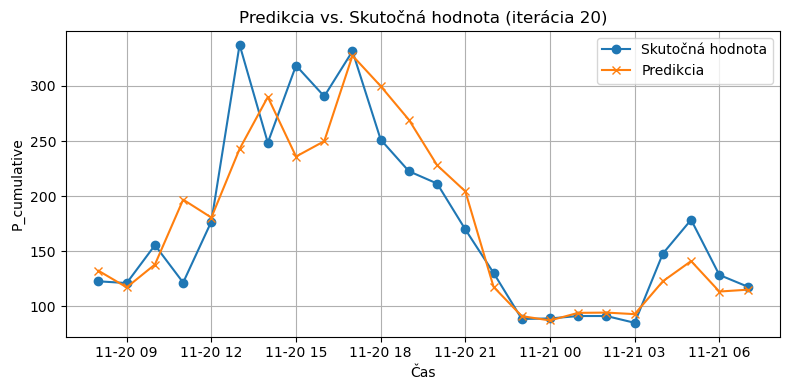

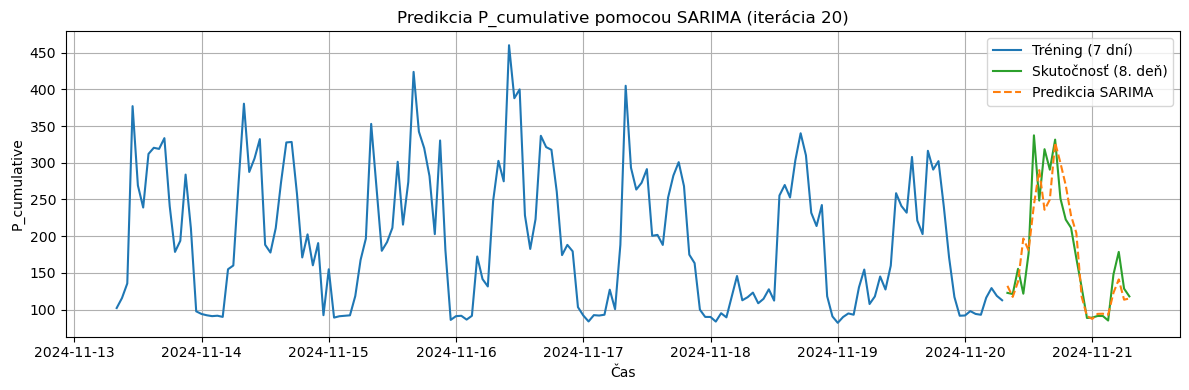


🔁 Iterácia 21/21
MAPE iterácie 21: 10.81%
MAE iterácie 21: 22.48


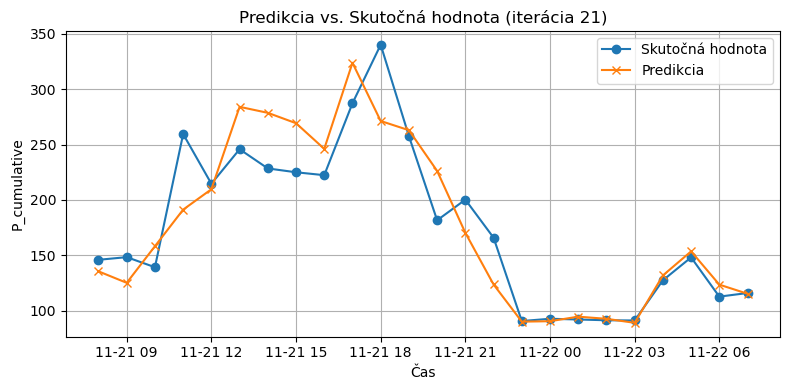

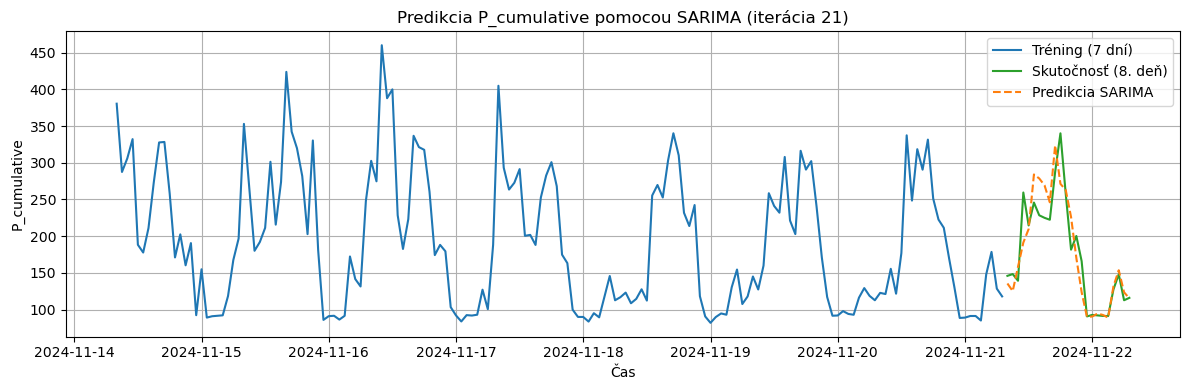


📈 Výsledky po 21 iteráciách:
✅ Priemerné MAPE: 27.42%
🔽 Minimálne MAPE: 10.35%
🔼 Maximálne MAPE: 65.13%
✅ Priemerné MAE: 49.67
🔽 Minimálne MAE: 16.23
🔼 Maximálne MAE: 100.16


In [184]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

# Zoradenie dát podľa času a nastavenie frekvencie
df2 = df2.sort_index()
df2 = df2.asfreq('H')  # predpokladáme hodinové údaje

# Parametre
train_days = 7   # 1 týždeň
test_days = 1    # 8. deň
total_iterations = 21
mape_list = []
mae_list = []

for i in range(total_iterations):
    print(f"\n🔁 Iterácia {i+1}/{total_iterations}")

    # Výpočet časových okien
    start_i = df2.index[0] + pd.Timedelta(days=i)
    train_end_i = start_i + pd.Timedelta(days=train_days)
    test_end_i = train_end_i + pd.Timedelta(days=test_days)

    # Tréningové a testovacie dáta
    train_i = df2.loc[(df2.index >= start_i) & (df2.index < train_end_i)]
    test_i = df2.loc[(df2.index >= train_end_i) & (df2.index < test_end_i)]

    # Tréning modelu
    model_i = SARIMAX(train_i['P_cumulative'],
                      order=(1, 0, 0),
                      seasonal_order=(1, 1, 0, 24),
                      enforce_stationarity=False,
                      enforce_invertibility=False)
    
    results_i = model_i.fit(disp=False)

    # Predikcia 8. dňa (24 hodín)
    forecast_i = results_i.forecast(steps=24)

    # Skutočné hodnoty
    true_values_i = test_i['P_cumulative'].values[:len(forecast_i)]
    forecast_i = forecast_i[:len(true_values_i)]

    # Výpočet MAPE a MAE
    mape_i = mean_absolute_percentage_error(true_values_i, forecast_i)
    mae_i = mean_absolute_error(true_values_i, forecast_i)

    mape_list.append(mape_i)
    mae_list.append(mae_i)

    print(f"MAPE iterácie {i+1}: {mape_i * 100:.2f}%")
    print(f"MAE iterácie {i+1}: {mae_i:.2f}")

    # 🎨 Graf 1 – predikcia vs. skutočnosť
    plt.figure(figsize=(8, 4))
    plt.plot(test_i.index[:len(true_values_i)], true_values_i, label='Skutočná hodnota', marker='o')
    plt.plot(test_i.index[:len(forecast_i)], forecast_i, label='Predikcia', marker='x')
    plt.title(f'Predikcia vs. Skutočná hodnota (iterácia {i+1})')
    plt.xlabel('Čas')
    plt.ylabel('P_cumulative')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 🎨 Graf 2 – tréning + test + predikcia
    plt.figure(figsize=(12, 4))
    plt.plot(train_i.index, train_i['P_cumulative'], label='Tréning (7 dní)', color='tab:blue')
    plt.plot(test_i.index, test_i['P_cumulative'], label='Skutočnosť (8. deň)', color='tab:green')
    plt.plot(test_i.index[:len(forecast_i)], forecast_i, label='Predikcia SARIMA', linestyle='--', color='tab:orange')
    plt.title(f'Predikcia P_cumulative pomocou SARIMA (iterácia {i+1})')
    plt.xlabel('Čas')
    plt.ylabel('P_cumulative')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 📊 Výsledky po všetkých iteráciách
average_mape = sum(mape_list) / len(mape_list)
min_mape = min(mape_list)
max_mape = max(mape_list)

average_mae = sum(mae_list) / len(mae_list)
min_mae = min(mae_list)
max_mae = max(mae_list)

print("\n📈 Výsledky po 21 iteráciách:")
print(f"✅ Priemerné MAPE: {average_mape * 100:.2f}%")
print(f"🔽 Minimálne MAPE: {min_mape * 100:.2f}%")
print(f"🔼 Maximálne MAPE: {max_mape * 100:.2f}%")
print(f"✅ Priemerné MAE: {average_mae:.2f}")
print(f"🔽 Minimálne MAE: {min_mae:.2f}")
print(f"🔼 Maximálne MAE: {max_mae:.2f}")


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,0)[24] intercept   : AIC=1656.138, Time=0.29 sec
 ARIMA(0,0,0)(0,1,0)[24] intercept   : AIC=1692.218, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[24] intercept   : AIC=1624.551, Time=1.73 sec
 ARIMA(0,0,1)(0,1,1)[24] intercept   : AIC=inf, Time=2.74 sec
 ARIMA(0,0,0)(0,1,0)[24]             : AIC=1690.245, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[24] intercept   : AIC=1655.748, Time=0.09 sec
 ARIMA(1,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=4.86 sec
 ARIMA(1,0,0)(0,1,1)[24] intercept   : AIC=inf, Time=1.70 sec
 ARIMA(0,0,0)(1,1,0)[24] intercept   : AIC=1665.750, Time=1.51 sec
 ARIMA(2,0,0)(1,1,0)[24] intercept   : AIC=1625.044, Time=1.68 sec
 ARIMA(1,0,1)(1,1,0)[24] intercept   : AIC=1625.400, Time=2.50 sec
 ARIMA(0,0,1)(1,1,0)[24] intercept   : AIC=1630.121, Time=2.15 sec
 ARIMA(2,0,1)(1,1,0)[24] intercept   : AIC=1623.179, Time=3.68 sec
 ARIMA(2,0,1)(0,1,0)[24] intercept   : AIC=1653.821, Time=0.36 sec
 ARIMA(2,0,1)(1,1,1)[24] intercept

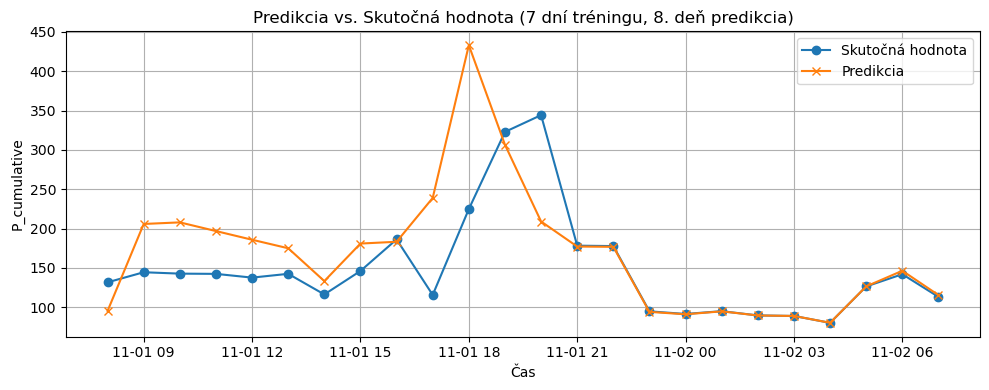

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error

# Zoradenie podľa času
df2 = df2.sort_index()

# Nastavenie časových okien
train_days = 7
test_days = 1

# Tréning: 1. – 7. deň
start = df2.index[0]
train_end = start + pd.Timedelta(days=train_days)
test_end = train_end + pd.Timedelta(days=test_days)

train = df2.loc[(df2.index >= start) & (df2.index < train_end)]
test = df2.loc[(df2.index >= train_end) & (df2.index < test_end)]

# Tréning modelu pomocou auto_arima
model = auto_arima(train['P_cumulative'],
                   start_p=1, max_p=3,
                   start_q=1, max_q=3,
                   start_P=0, max_P=1,
                   start_Q=0, max_Q=1,
                   d=None, D=1,
                   seasonal=True,
                   m=24,
                   stepwise=True,
                   n_jobs=1,
                   suppress_warnings=True,
                   error_action='ignore',
                   trace=True)

# Výpis nájdených najlepších parametrov
print("\n🔧 Najlepšie nájdené parametre:")
print(f"order = {model.order}")
print(f"seasonal_order = {model.seasonal_order}")

# Predikcia na 1 deň (24 hodín)
forecast = model.predict(n_periods=24)
true_values = test['P_cumulative'].values[:len(forecast)]
forecast = forecast[:len(true_values)]

# Výpočet MAPE
mape = mean_absolute_percentage_error(true_values, forecast)
print(f"\n📊 MAPE: {mape * 100:.2f}%")

# Graf – predikcia vs. skutočnosť
plt.figure(figsize=(10, 4))
plt.plot(test.index, true_values, label='Skutočná hodnota', marker='o')
plt.plot(test.index, forecast, label='Predikcia', marker='x')
plt.title('Predikcia vs. Skutočná hodnota (7 dní tréningu, 8. deň predikcia)')
plt.xlabel('Čas')
plt.ylabel('P_cumulative')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,0)[24] intercept   : AIC=3522.706, Time=0.38 sec
 ARIMA(0,0,0)(0,1,0)[24] intercept   : AIC=3634.020, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[24] intercept   : AIC=3452.915, Time=2.84 sec
 ARIMA(0,0,1)(0,1,1)[24] intercept   : AIC=inf, Time=2.64 sec
 ARIMA(0,0,0)(0,1,0)[24]             : AIC=3632.034, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[24] intercept   : AIC=3523.103, Time=0.17 sec
 ARIMA(1,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=4.68 sec
 ARIMA(1,0,0)(0,1,1)[24] intercept   : AIC=inf, Time=4.11 sec
 ARIMA(0,0,0)(1,1,0)[24] intercept   : AIC=3558.983, Time=2.89 sec
 ARIMA(2,0,0)(1,1,0)[24] intercept   : AIC=3452.335, Time=3.10 sec
 ARIMA(2,0,0)(0,1,0)[24] intercept   : AIC=3522.699, Time=0.30 sec
 ARIMA(2,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=5.79 sec
 ARIMA(2,0,0)(0,1,1)[24] intercept   : AIC=inf, Time=4.31 sec
 ARIMA(3,0,0)(1,1,0)[24] intercept   : AIC=3454.152, Time=4.47 sec
 ARIMA(2,0,1)(1,1,0)[24] intercept   : AIC=3

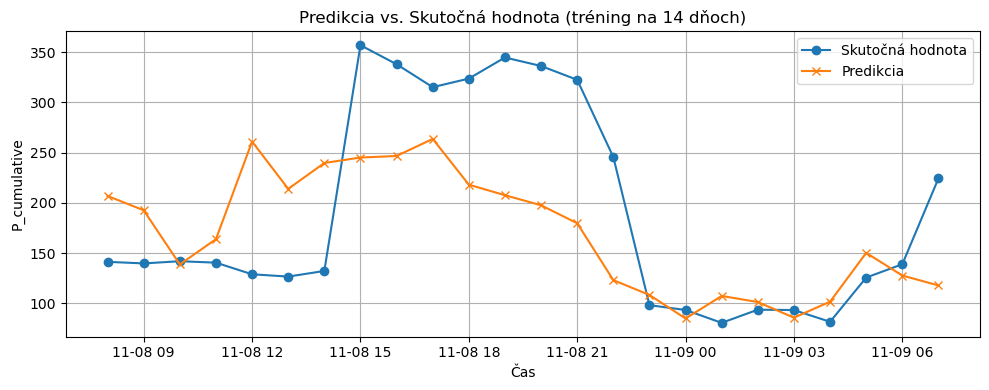

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error

# Zoradenie podľa času
df2 = df2.sort_index()

# Nastavenie časových okien
train_days = 14
test_days = 1

# Tréning: 1. – 14. deň
start = df2.index[0]
train_end = start + pd.Timedelta(days=train_days)
test_end = train_end + pd.Timedelta(days=test_days)

train = df2.loc[(df2.index >= start) & (df2.index < train_end)]
test = df2.loc[(df2.index >= train_end) & (df2.index < test_end)]

# Tréning modelu pomocou auto_arima
model = auto_arima(train['P_cumulative'],
                   start_p=1, max_p=3,
                   start_q=1, max_q=3,
                   start_P=0, max_P=1,
                   start_Q=0, max_Q=1,
                   d=None, D=1,
                   seasonal=True,
                   m=24,  # denná sezónnosť (hodinové dáta)
                   stepwise=True,
                   n_jobs=1,
                   suppress_warnings=True,
                   error_action='ignore',
                   trace=True)

# Výpis nájdených parametrov
print("\n🔧 Najlepšie nájdené parametre:")
print(f"order = {model.order}")
print(f"seasonal_order = {model.seasonal_order}")

# Predikcia na 15. deň (24 hodín)
forecast = model.predict(n_periods=24)
true_values = test['P_cumulative'].values[:len(forecast)]
forecast = forecast[:len(true_values)]

# Výpočet MAPE
mape = mean_absolute_percentage_error(true_values, forecast)
print(f"\n📊 MAPE (14 dní tréning, 15. deň predikcia): {mape * 100:.2f}%")

# Vizualizácia
plt.figure(figsize=(10, 4))
plt.plot(test.index, true_values, label='Skutočná hodnota', marker='o')
plt.plot(test.index, forecast, label='Predikcia', marker='x')
plt.title('Predikcia vs. Skutočná hodnota (tréning na 14 dňoch)')
plt.xlabel('Čas')
plt.ylabel('P_cumulative')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,0)[24] intercept   : AIC=5351.148, Time=0.54 sec
 ARIMA(0,0,0)(0,1,0)[24] intercept   : AIC=5532.924, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[24] intercept   : AIC=5267.758, Time=5.80 sec
 ARIMA(0,0,1)(0,1,1)[24] intercept   : AIC=inf, Time=8.93 sec
 ARIMA(0,0,0)(0,1,0)[24]             : AIC=5531.223, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[24] intercept   : AIC=5353.056, Time=0.22 sec
 ARIMA(1,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=6.07 sec
 ARIMA(1,0,0)(0,1,1)[24] intercept   : AIC=inf, Time=4.32 sec
 ARIMA(0,0,0)(1,1,0)[24] intercept   : AIC=5447.497, Time=14.02 sec
 ARIMA(2,0,0)(1,1,0)[24] intercept   : AIC=5265.181, Time=4.49 sec
 ARIMA(2,0,0)(0,1,0)[24] intercept   : AIC=5350.438, Time=0.48 sec
 ARIMA(2,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=8.30 sec
 ARIMA(2,0,0)(0,1,1)[24] intercept   : AIC=inf, Time=7.63 sec
 ARIMA(3,0,0)(1,1,0)[24] intercept   : AIC=5266.356, Time=5.09 sec
 ARIMA(2,0,1)(1,1,0)[24] intercept   : AIC=

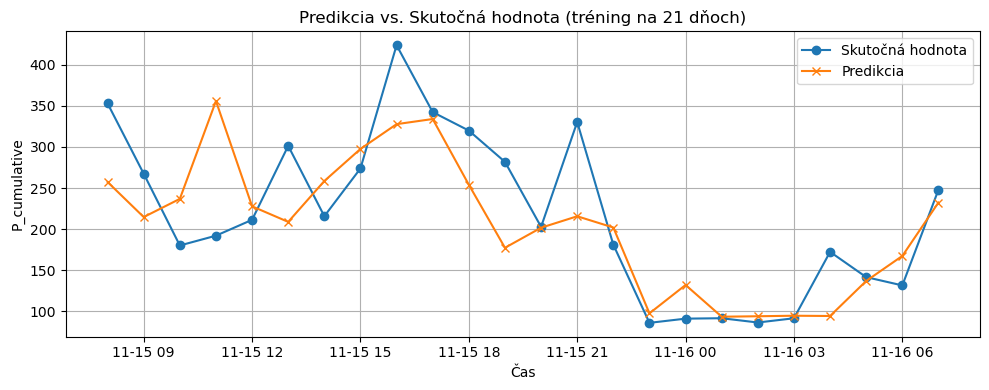

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error

# Zoradenie podľa času
df2 = df2.sort_index()

# Nastavenie časových okien
train_days = 21
test_days = 1

# Tréning: 1. – 21. deň
start = df2.index[0]
train_end = start + pd.Timedelta(days=train_days)
test_end = train_end + pd.Timedelta(days=test_days)

train = df2.loc[(df2.index >= start) & (df2.index < train_end)]
test = df2.loc[(df2.index >= train_end) & (df2.index < test_end)]

# Tréning modelu pomocou auto_arima
model = auto_arima(train['P_cumulative'],
                   start_p=1, max_p=3,
                   start_q=1, max_q=3,
                   start_P=0, max_P=1,
                   start_Q=0, max_Q=1,
                   d=None, D=1,
                   seasonal=True,
                   m=24,  # denná sezónnosť pre hodinové dáta
                   stepwise=True,
                   n_jobs=1,
                   suppress_warnings=True,
                   error_action='ignore',
                   trace=True)

# Výpis nájdených parametrov
print("\n🔧 Najlepšie nájdené parametre:")
print(f"order = {model.order}")
print(f"seasonal_order = {model.seasonal_order}")

# Predikcia na 22. deň (24 hodín)
forecast = model.predict(n_periods=24)
true_values = test['P_cumulative'].values[:len(forecast)]
forecast = forecast[:len(true_values)]

# Výpočet MAPE
mape = mean_absolute_percentage_error(true_values, forecast)
print(f"\n📊 MAPE (21 dní tréning, 22. deň predikcia): {mape * 100:.2f}%")

# Vizualizácia
plt.figure(figsize=(10, 4))
plt.plot(test.index, true_values, label='Skutočná hodnota', marker='o')
plt.plot(test.index, forecast, label='Predikcia', marker='x')
plt.title('Predikcia vs. Skutočná hodnota (tréning na 21 dňoch)')
plt.xlabel('Čas')
plt.ylabel('P_cumulative')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

# Zoradenie dát podľa času a nastavenie frekvencie
df2 = df2.sort_index()
df2 = df2.asfreq('H')  # predpokladáme hodinové údaje

# Parametre
train_days = 14   # 1 týždeň
test_days = 1    # 8. deň
total_iterations = 14
mape_list = []
mae_list = []

for i in range(total_iterations):
    print(f"\n🔁 Iterácia {i+1}/{total_iterations}")

    # Výpočet časových okien
    start_i = df2.index[0] + pd.Timedelta(days=i)
    train_end_i = start_i + pd.Timedelta(days=train_days)
    test_end_i = train_end_i + pd.Timedelta(days=test_days)

    # Tréningové a testovacie dáta
    train_i = df2.loc[(df2.index >= start_i) & (df2.index < train_end_i)]
    test_i = df2.loc[(df2.index >= train_end_i) & (df2.index < test_end_i)]

    # Tréning modelu
    model_i = SARIMAX(train_i['P_cumulative'],
                      order=(1, 0, 0),
                      seasonal_order=(1, 1, 0, 24),
                      enforce_stationarity=False,
                      enforce_invertibility=False)
    
    results_i = model_i.fit(disp=False)

    # Predikcia 8. dňa (24 hodín)
    forecast_i = results_i.forecast(steps=24)

    # Skutočné hodnoty
    true_values_i = test_i['P_cumulative'].values[:len(forecast_i)]
    forecast_i = forecast_i[:len(true_values_i)]

    # Výpočet MAPE a MAE
    mape_i = mean_absolute_percentage_error(true_values_i, forecast_i)
    mae_i = mean_absolute_error(true_values_i, forecast_i)

    mape_list.append(mape_i)
    mae_list.append(mae_i)

    print(f"MAPE iterácie {i+1}: {mape_i * 100:.2f}%")
    print(f"MAE iterácie {i+1}: {mae_i:.2f}")

    # 🎨 Graf 1 – predikcia vs. skutočnosť
    #plt.figure(figsize=(8, 4))
    #plt.plot(test_i.index[:len(true_values_i)], true_values_i, label='Skutočná hodnota', marker='o')
    #plt.plot(test_i.index[:len(forecast_i)], forecast_i, label='Predikcia', marker='x')
    #plt.title(f'Predikcia vs. Skutočná hodnota (iterácia {i+1})')
    #plt.xlabel('Čas')
    #plt.ylabel('P_cumulative')
    #plt.legend()
    #plt.grid(True)
    #plt.tight_layout()
    #plt.show()

    # 🎨 Graf 2 – tréning + test + predikcia
    #plt.figure(figsize=(12, 4))
    #plt.plot(train_i.index, train_i['P_cumulative'], label='Tréning (7 dní)', color='tab:blue')
    #plt.plot(test_i.index, test_i['P_cumulative'], label='Skutočnosť (8. deň)', color='tab:green')
    #plt.plot(test_i.index[:len(forecast_i)], forecast_i, label='Predikcia SARIMA', linestyle='--', color='tab:orange')
    #plt.title(f'Predikcia P_cumulative pomocou SARIMA (iterácia {i+1})')
    #plt.xlabel('Čas')
    #plt.ylabel('P_cumulative')
    #plt.legend()
    #plt.grid(True)
    #plt.tight_layout()
    #plt.show()

# 📊 Výsledky po všetkých iteráciách
average_mape = sum(mape_list) / len(mape_list)
min_mape = min(mape_list)
max_mape = max(mape_list)

average_mae = sum(mae_list) / len(mae_list)
min_mae = min(mae_list)
max_mae = max(mae_list)

print("\n📈 Výsledky po 21 iteráciách:")
print(f"✅ Priemerné MAPE: {average_mape * 100:.2f}%")
print(f"🔽 Minimálne MAPE: {min_mape * 100:.2f}%")
print(f"🔼 Maximálne MAPE: {max_mape * 100:.2f}%")
print(f"✅ Priemerné MAE: {average_mae:.2f}")
print(f"🔽 Minimálne MAE: {min_mae:.2f}")
print(f"🔼 Maximálne MAE: {max_mae:.2f}")


C:\Users\patri\AppData\Local\Temp\ipykernel_195756\3499134956.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df2 = df2.asfreq('H')  # predpokladáme hodinové údaje



🔁 Iterácia 1/14
MAPE iterácie 1: 33.79%
MAE iterácie 1: 66.83

🔁 Iterácia 2/14
MAPE iterácie 2: 21.15%
MAE iterácie 2: 39.92

🔁 Iterácia 3/14
MAPE iterácie 3: 12.60%
MAE iterácie 3: 19.94

🔁 Iterácia 4/14
MAPE iterácie 4: 11.78%
MAE iterácie 4: 22.45

🔁 Iterácia 5/14
MAPE iterácie 5: 25.01%
MAE iterácie 5: 55.66

🔁 Iterácia 6/14
MAPE iterácie 6: 18.42%
MAE iterácie 6: 38.95

🔁 Iterácia 7/14
MAPE iterácie 7: 23.02%
MAE iterácie 7: 49.17

🔁 Iterácia 8/14
MAPE iterácie 8: 20.81%
MAE iterácie 8: 47.63

🔁 Iterácia 9/14
MAPE iterácie 9: 20.59%
MAE iterácie 9: 48.73

🔁 Iterácia 10/14
MAPE iterácie 10: 19.44%
MAE iterácie 10: 36.37

🔁 Iterácia 11/14
MAPE iterácie 11: 43.65%
MAE iterácie 11: 59.56

🔁 Iterácia 12/14
MAPE iterácie 12: 13.92%
MAE iterácie 12: 26.84

🔁 Iterácia 13/14
MAPE iterácie 13: 14.55%
MAE iterácie 13: 28.46

🔁 Iterácia 14/14
MAPE iterácie 14: 12.34%
MAE iterácie 14: 25.79

📈 Výsledky po 21 iteráciách:
✅ Priemerné MAPE: 20.79%
🔽 Minimálne MAPE: 11.78%
🔼 Maximálne MAPE: 43.65

C:\Users\patri\AppData\Local\Temp\ipykernel_195756\648196090.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df2 = df2.asfreq('H')  # predpokladáme hodinové údaje



🔁 Iterácia 1/7
MAPE iterácie 1: 20.92%
MAE iterácie 1: 48.02


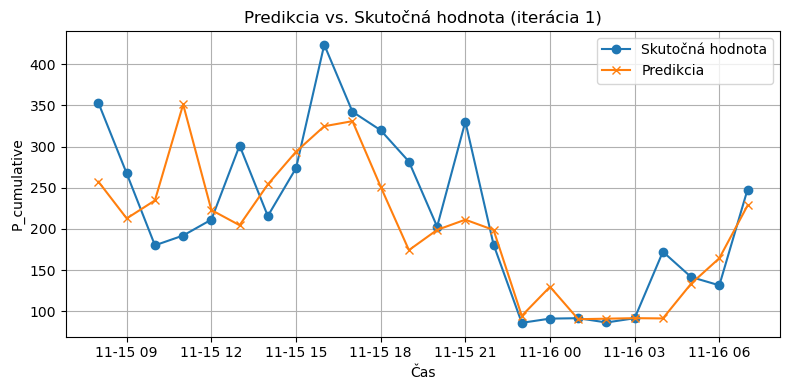


🔁 Iterácia 2/7
MAPE iterácie 2: 19.68%
MAE iterácie 2: 46.67


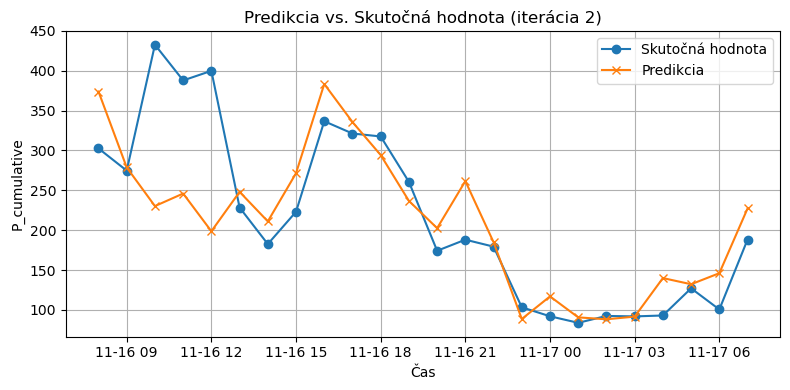


🔁 Iterácia 3/7
MAPE iterácie 3: 20.02%
MAE iterácie 3: 37.23


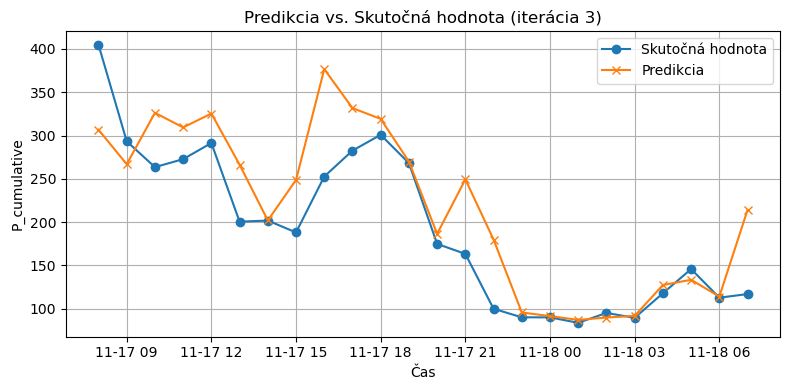


🔁 Iterácia 4/7
MAPE iterácie 4: 43.72%
MAE iterácie 4: 58.92


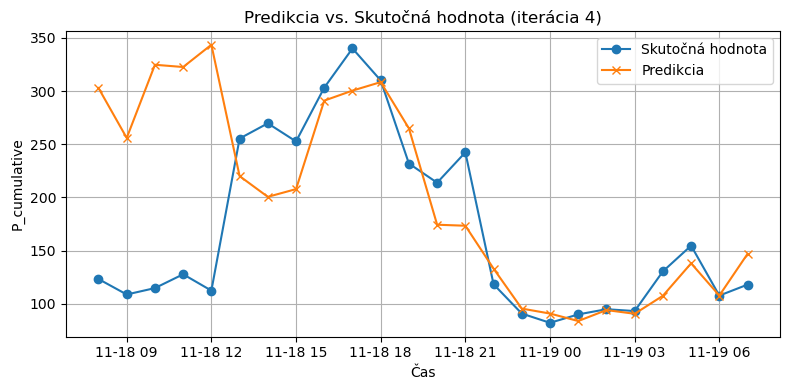


🔁 Iterácia 5/7
MAPE iterácie 5: 16.90%
MAE iterácie 5: 30.43


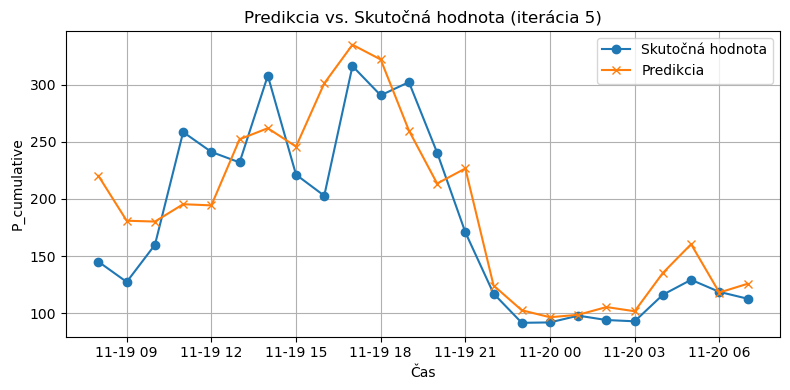


🔁 Iterácia 6/7
MAPE iterácie 6: 14.14%
MAE iterácie 6: 27.63


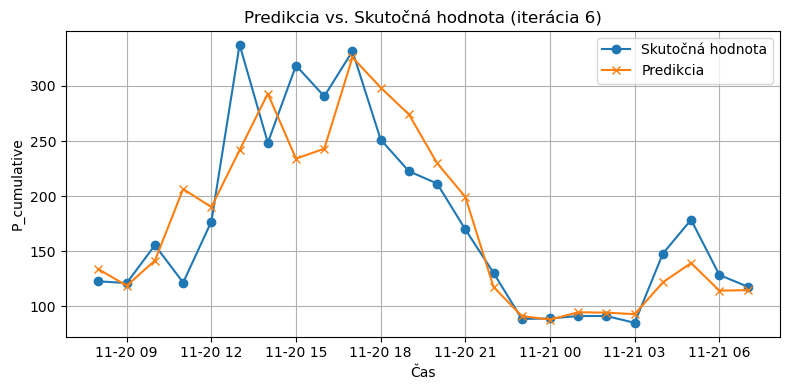


🔁 Iterácia 7/7
MAPE iterácie 7: 11.84%
MAE iterácie 7: 24.66


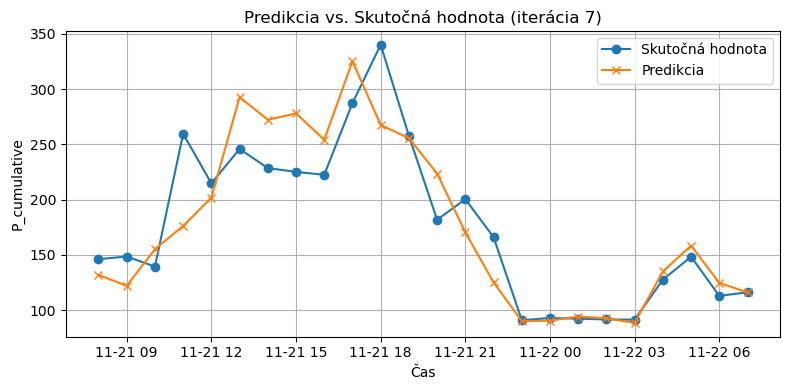


📈 Výsledky po 21 iteráciách:
✅ Priemerné MAPE: 21.03%
🔽 Minimálne MAPE: 11.84%
🔼 Maximálne MAPE: 43.72%
✅ Priemerné MAE: 39.08
🔽 Minimálne MAE: 24.66
🔼 Maximálne MAE: 58.92


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

# Zoradenie dát podľa času a nastavenie frekvencie
df2 = df2.sort_index()
df2 = df2.asfreq('H')  # predpokladáme hodinové údaje

# Parametre
train_days = 21   # 1 týždeň
test_days = 1    # 8. deň
total_iterations = 7
mape_list = []
mae_list = []

for i in range(total_iterations):
    print(f"\n🔁 Iterácia {i+1}/{total_iterations}")

    # Výpočet časových okien
    start_i = df2.index[0] + pd.Timedelta(days=i)
    train_end_i = start_i + pd.Timedelta(days=train_days)
    test_end_i = train_end_i + pd.Timedelta(days=test_days)

    # Tréningové a testovacie dáta
    train_i = df2.loc[(df2.index >= start_i) & (df2.index < train_end_i)]
    test_i = df2.loc[(df2.index >= train_end_i) & (df2.index < test_end_i)]

    # Tréning modelu
    model_i = SARIMAX(train_i['P_cumulative'],
                      order=(2, 0, 1),
                      seasonal_order=(1, 1, 0, 24),
                      enforce_stationarity=False,
                      enforce_invertibility=False)
    
    results_i = model_i.fit(disp=False)

    # Predikcia 8. dňa (24 hodín)
    forecast_i = results_i.forecast(steps=24)

    # Skutočné hodnoty
    true_values_i = test_i['P_cumulative'].values[:len(forecast_i)]
    forecast_i = forecast_i[:len(true_values_i)]

    # Výpočet MAPE a MAE
    mape_i = mean_absolute_percentage_error(true_values_i, forecast_i)
    mae_i = mean_absolute_error(true_values_i, forecast_i)

    mape_list.append(mape_i)
    mae_list.append(mae_i)

    print(f"MAPE iterácie {i+1}: {mape_i * 100:.2f}%")
    print(f"MAE iterácie {i+1}: {mae_i:.2f}")

    # 🎨 Graf 1 – predikcia vs. skutočnosť
    plt.figure(figsize=(8, 4))
    plt.plot(test_i.index[:len(true_values_i)], true_values_i, label='Skutočná hodnota', marker='o')
    plt.plot(test_i.index[:len(forecast_i)], forecast_i, label='Predikcia', marker='x')
    plt.title(f'Predikcia vs. Skutočná hodnota (iterácia {i+1})')
    plt.xlabel('Čas')
    plt.ylabel('P_cumulative')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 🎨 Graf 2 – tréning + test + predikcia
    #plt.figure(figsize=(12, 4))
    #plt.plot(train_i.index, train_i['P_cumulative'], label='Tréning (7 dní)', color='tab:blue')
    #plt.plot(test_i.index, test_i['P_cumulative'], label='Skutočnosť (8. deň)', color='tab:green')
    #plt.plot(test_i.index[:len(forecast_i)], forecast_i, label='Predikcia SARIMA', linestyle='--', color='tab:orange')
    #plt.title(f'Predikcia P_cumulative pomocou SARIMA (iterácia {i+1})')
    #plt.xlabel('Čas')
    #plt.ylabel('P_cumulative')
    #plt.legend()
    #plt.grid(True)
    #plt.tight_layout()
    #plt.show()

# 📊 Výsledky po všetkých iteráciách
average_mape = sum(mape_list) / len(mape_list)
min_mape = min(mape_list)
max_mape = max(mape_list)

average_mae = sum(mae_list) / len(mae_list)
min_mae = min(mae_list)
max_mae = max(mae_list)

print("\n📈 Výsledky po 21 iteráciách:")
print(f"✅ Priemerné MAPE: {average_mape * 100:.2f}%")
print(f"🔽 Minimálne MAPE: {min_mape * 100:.2f}%")
print(f"🔼 Maximálne MAPE: {max_mape * 100:.2f}%")
print(f"✅ Priemerné MAE: {average_mae:.2f}")
print(f"🔽 Minimálne MAE: {min_mae:.2f}")
print(f"🔼 Maximálne MAE: {max_mae:.2f}")


C:\Users\patri\AppData\Local\Temp\ipykernel_195756\289289585.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df2 = df2.asfreq('H')  # predpokladáme hodinové údaje



🔁 Iterácia 1/21
MAPE iterácie 1: 20.74%
MAE iterácie 1: 34.85


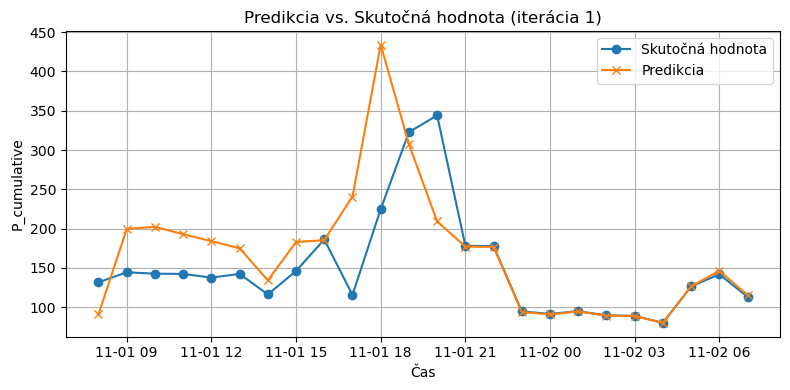


🔁 Iterácia 2/21
MAPE iterácie 2: 21.88%
MAE iterácie 2: 58.92


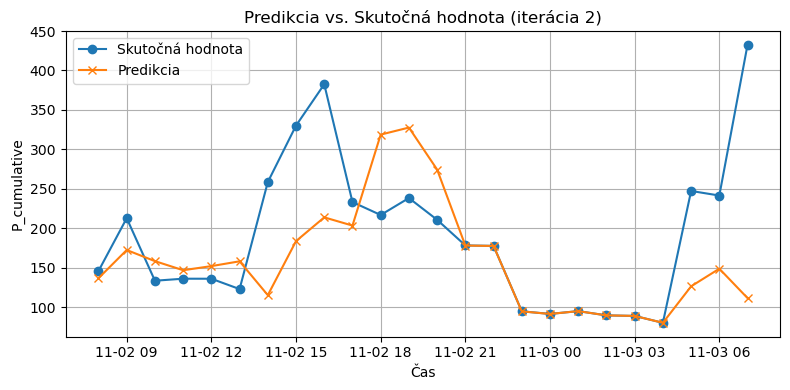


🔁 Iterácia 3/21
MAPE iterácie 3: 33.19%
MAE iterácie 3: 61.77


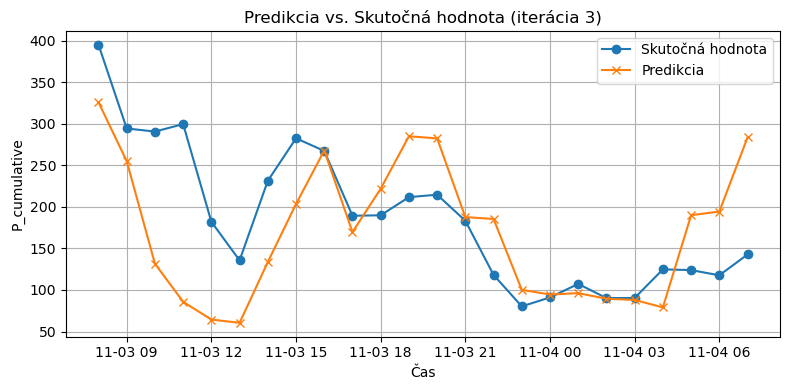


🔁 Iterácia 4/21
MAPE iterácie 4: 25.40%
MAE iterácie 4: 36.16


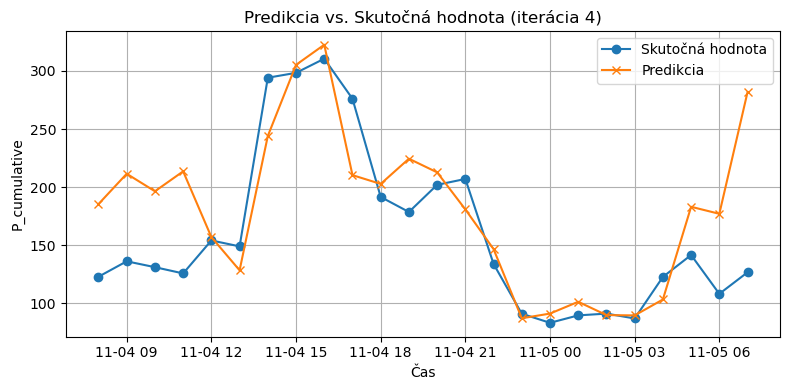


🔁 Iterácia 5/21
MAPE iterácie 5: 17.27%
MAE iterácie 5: 36.23


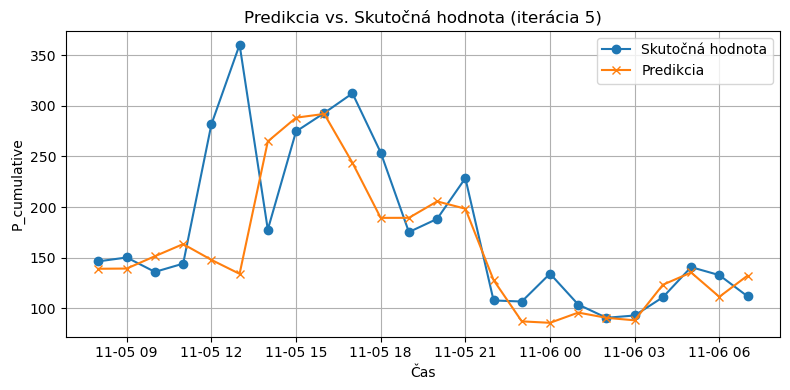


🔁 Iterácia 6/21
MAPE iterácie 6: 9.57%
MAE iterácie 6: 15.06


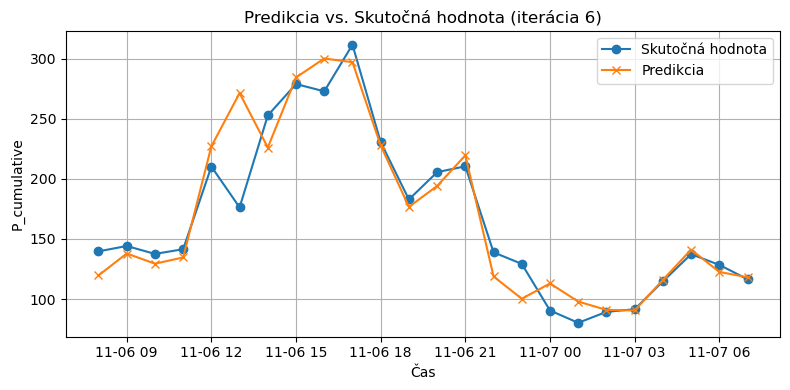


🔁 Iterácia 7/21
MAPE iterácie 7: 21.33%
MAE iterácie 7: 37.69


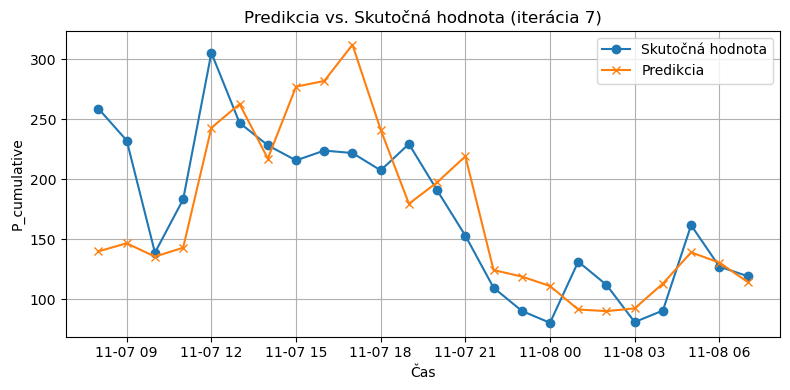


🔁 Iterácia 8/21
MAPE iterácie 8: 33.55%
MAE iterácie 8: 66.39


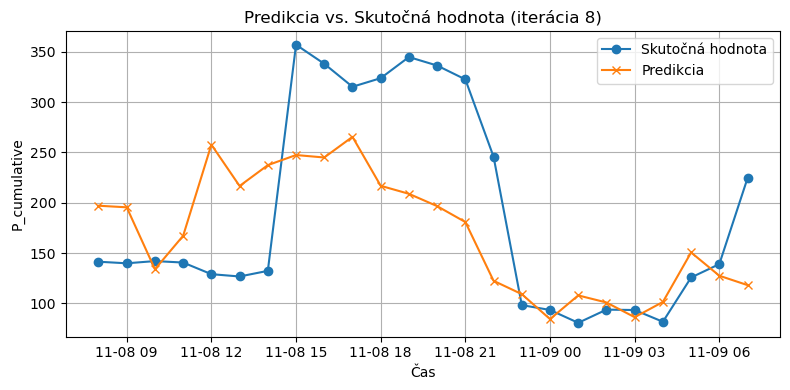


🔁 Iterácia 9/21
MAPE iterácie 9: 18.38%
MAE iterácie 9: 35.39


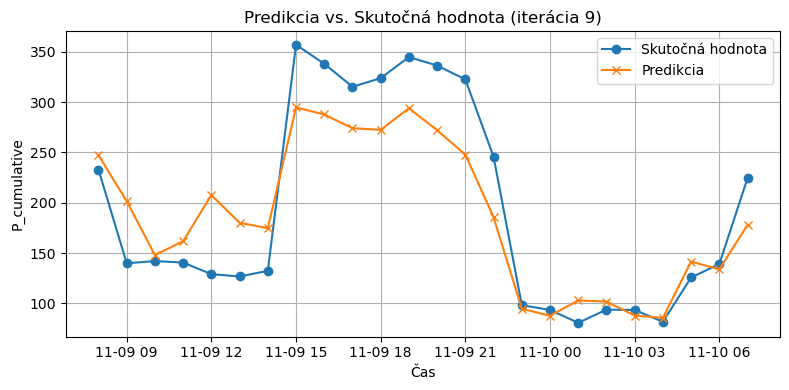


🔁 Iterácia 10/21
MAPE iterácie 10: 12.56%
MAE iterácie 10: 19.92


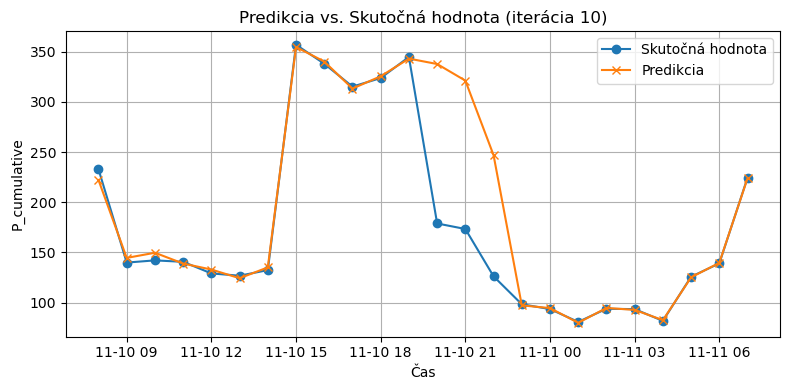


🔁 Iterácia 11/21
MAPE iterácie 11: 13.64%
MAE iterácie 11: 25.28


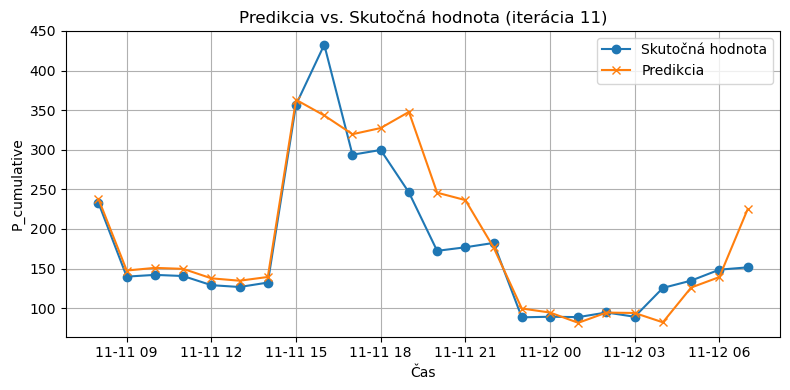


🔁 Iterácia 12/21
MAPE iterácie 12: 24.60%
MAE iterácie 12: 55.02


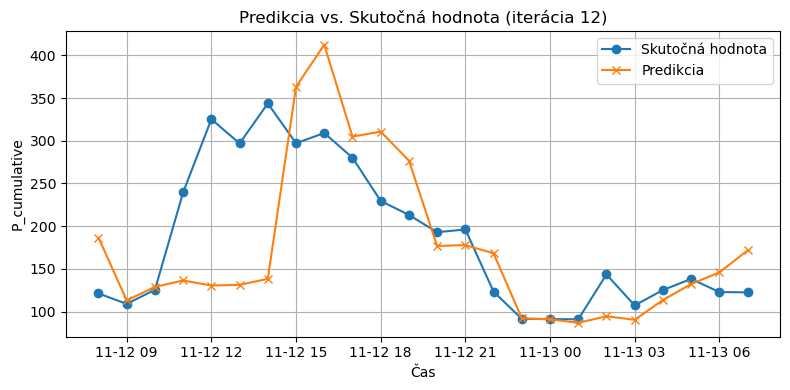


🔁 Iterácia 13/21
MAPE iterácie 13: 17.18%
MAE iterácie 13: 35.23


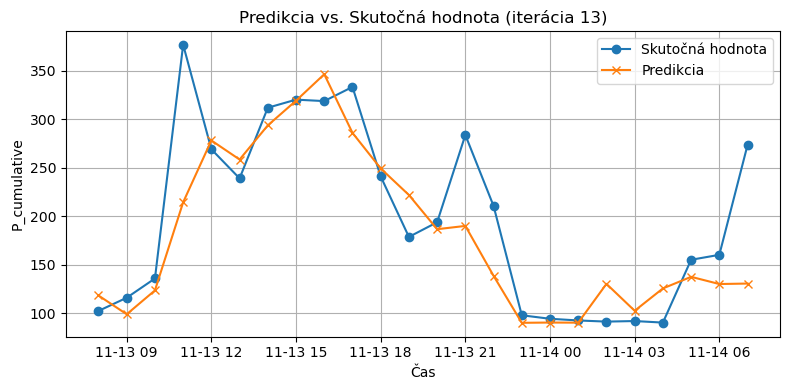


🔁 Iterácia 14/21
MAPE iterácie 14: 21.06%
MAE iterácie 14: 47.36


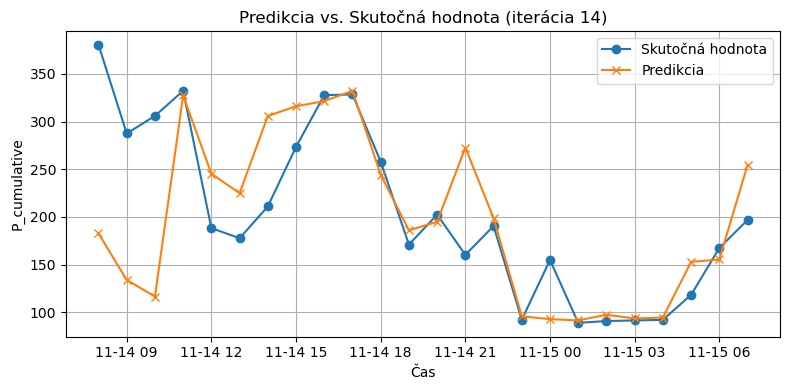


🔁 Iterácia 15/21
MAPE iterácie 15: 21.42%
MAE iterácie 15: 48.32


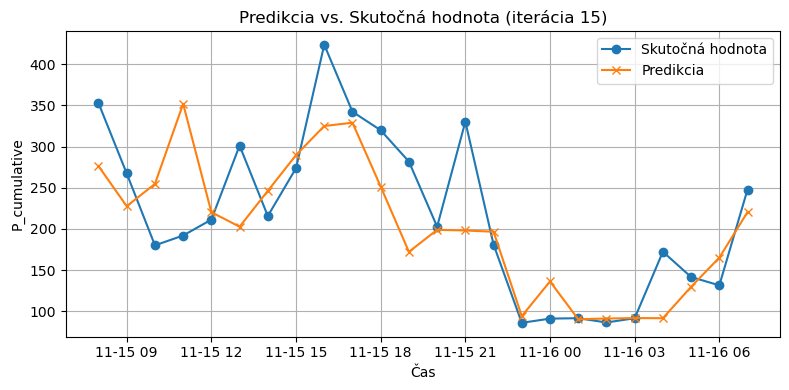


🔁 Iterácia 16/21
MAPE iterácie 16: 20.51%
MAE iterácie 16: 48.94


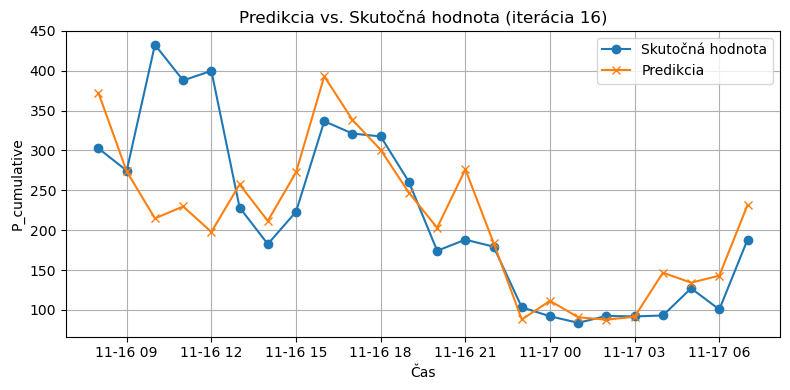


🔁 Iterácia 17/21
MAPE iterácie 17: 20.00%
MAE iterácie 17: 36.94


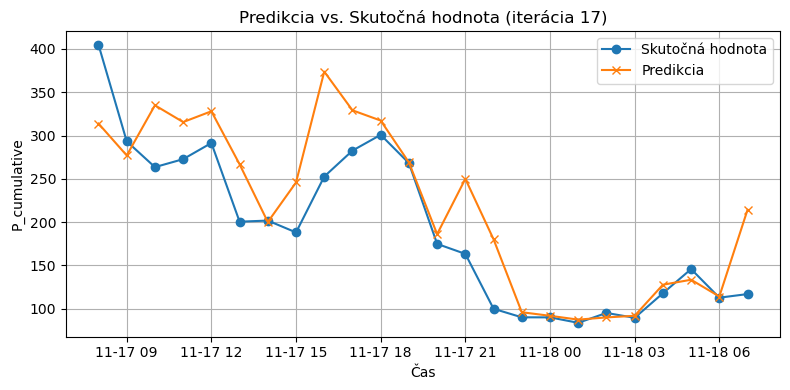


🔁 Iterácia 18/21
MAPE iterácie 18: 47.29%
MAE iterácie 18: 61.50


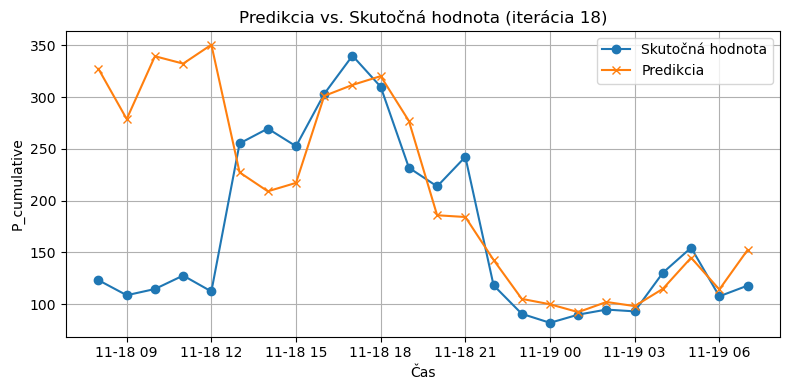


🔁 Iterácia 19/21
MAPE iterácie 19: 14.36%
MAE iterácie 19: 26.77


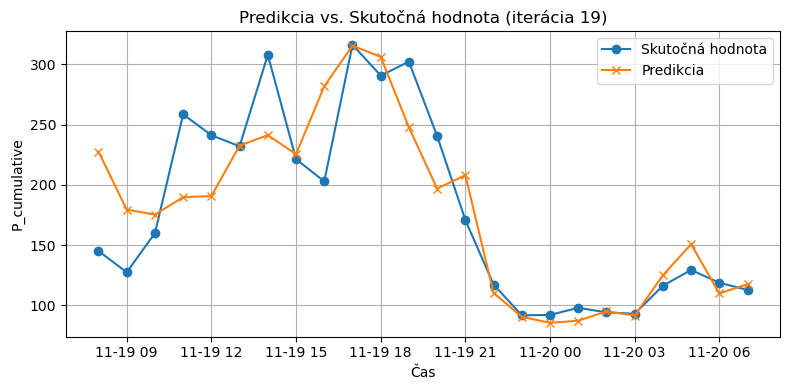


🔁 Iterácia 20/21


C:\Users\patri\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE iterácie 20: 13.48%
MAE iterácie 20: 26.33


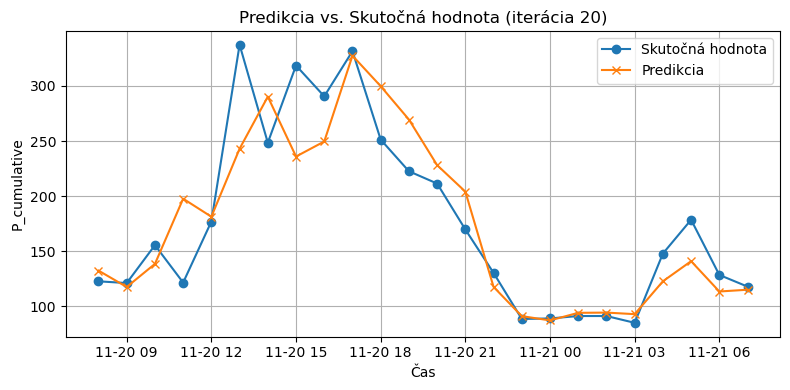


🔁 Iterácia 21/21
MAPE iterácie 21: 10.96%
MAE iterácie 21: 22.76


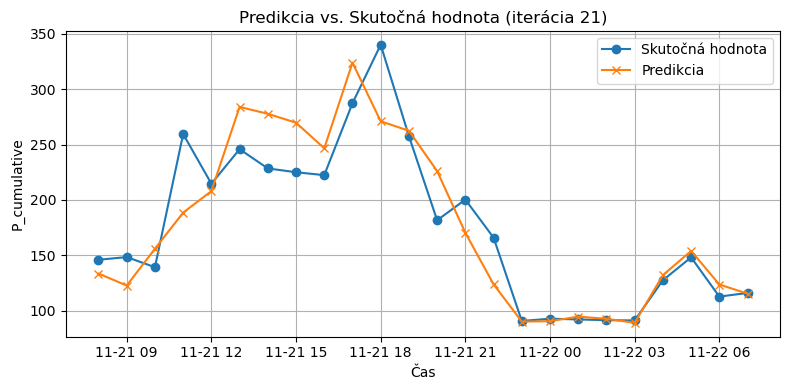


📈 Výsledky po 21 iteráciách:
✅ Priemerné MAPE: 20.87%
🔽 Minimálne MAPE: 9.57%
🔼 Maximálne MAPE: 47.29%
✅ Priemerné MAE: 39.85
🔽 Minimálne MAE: 15.06
🔼 Maximálne MAE: 66.39


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

# Zoradenie dát podľa času a nastavenie frekvencie
df2 = df2.sort_index()
df2 = df2.asfreq('H')  # predpokladáme hodinové údaje

# Parametre
train_days = 7   # 1 týždeň
test_days = 1    # 8. deň
total_iterations = 21
mape_list = []
mae_list = []

for i in range(total_iterations):
    print(f"\n🔁 Iterácia {i+1}/{total_iterations}")

    # Výpočet časových okien
    start_i = df2.index[0] + pd.Timedelta(days=i)
    train_end_i = start_i + pd.Timedelta(days=train_days)
    test_end_i = train_end_i + pd.Timedelta(days=test_days)

    # Tréningové a testovacie dáta
    train_i = df2.loc[(df2.index >= start_i) & (df2.index < train_end_i)]
    test_i = df2.loc[(df2.index >= train_end_i) & (df2.index < test_end_i)]

    # Tréning modelu
    model_i = SARIMAX(train_i['P_cumulative'],
                      order=(2, 0, 1),
                      seasonal_order=(1, 1, 0, 24),
                      enforce_stationarity=False,
                      enforce_invertibility=False)
    
    results_i = model_i.fit(disp=False)

    # Predikcia 8. dňa (24 hodín)
    forecast_i = results_i.forecast(steps=24)

    # Skutočné hodnoty
    true_values_i = test_i['P_cumulative'].values[:len(forecast_i)]
    forecast_i = forecast_i[:len(true_values_i)]

    # Výpočet MAPE a MAE
    mape_i = mean_absolute_percentage_error(true_values_i, forecast_i)
    mae_i = mean_absolute_error(true_values_i, forecast_i)

    mape_list.append(mape_i)
    mae_list.append(mae_i)

    print(f"MAPE iterácie {i+1}: {mape_i * 100:.2f}%")
    print(f"MAE iterácie {i+1}: {mae_i:.2f}")

    # 🎨 Graf 1 – predikcia vs. skutočnosť
    plt.figure(figsize=(8, 4))
    plt.plot(test_i.index[:len(true_values_i)], true_values_i, label='Skutočná hodnota', marker='o')
    plt.plot(test_i.index[:len(forecast_i)], forecast_i, label='Predikcia', marker='x')
    plt.title(f'Predikcia vs. Skutočná hodnota (iterácia {i+1})')
    plt.xlabel('Čas')
    plt.ylabel('P_cumulative')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 🎨 Graf 2 – tréning + test + predikcia
    #plt.figure(figsize=(12, 4))
    #plt.plot(train_i.index, train_i['P_cumulative'], label='Tréning (7 dní)', color='tab:blue')
    #plt.plot(test_i.index, test_i['P_cumulative'], label='Skutočnosť (8. deň)', color='tab:green')
    #plt.plot(test_i.index[:len(forecast_i)], forecast_i, label='Predikcia SARIMA', linestyle='--', color='tab:orange')
    #plt.title(f'Predikcia P_cumulative pomocou SARIMA (iterácia {i+1})')
    #plt.xlabel('Čas')
    #plt.ylabel('P_cumulative')
    #plt.legend()
    #plt.grid(True)
    #plt.tight_layout()
    #plt.show()

# 📊 Výsledky po všetkých iteráciách
average_mape = sum(mape_list) / len(mape_list)
min_mape = min(mape_list)
max_mape = max(mape_list)

average_mae = sum(mae_list) / len(mae_list)
min_mae = min(mae_list)
max_mae = max(mae_list)

print("\n📈 Výsledky po 21 iteráciách:")
print(f"✅ Priemerné MAPE: {average_mape * 100:.2f}%")
print(f"🔽 Minimálne MAPE: {min_mape * 100:.2f}%")
print(f"🔼 Maximálne MAPE: {max_mape * 100:.2f}%")
print(f"✅ Priemerné MAE: {average_mae:.2f}")
print(f"🔽 Minimálne MAE: {min_mae:.2f}")
print(f"🔼 Maximálne MAE: {max_mae:.2f}")
